# **Seoul Bike Sharing Demand Prediction**




##### **Project Type**    - Regression
##### **Contribution**    - Individual
**submitted by** - Aakesh Ram A.K.

# Summary :

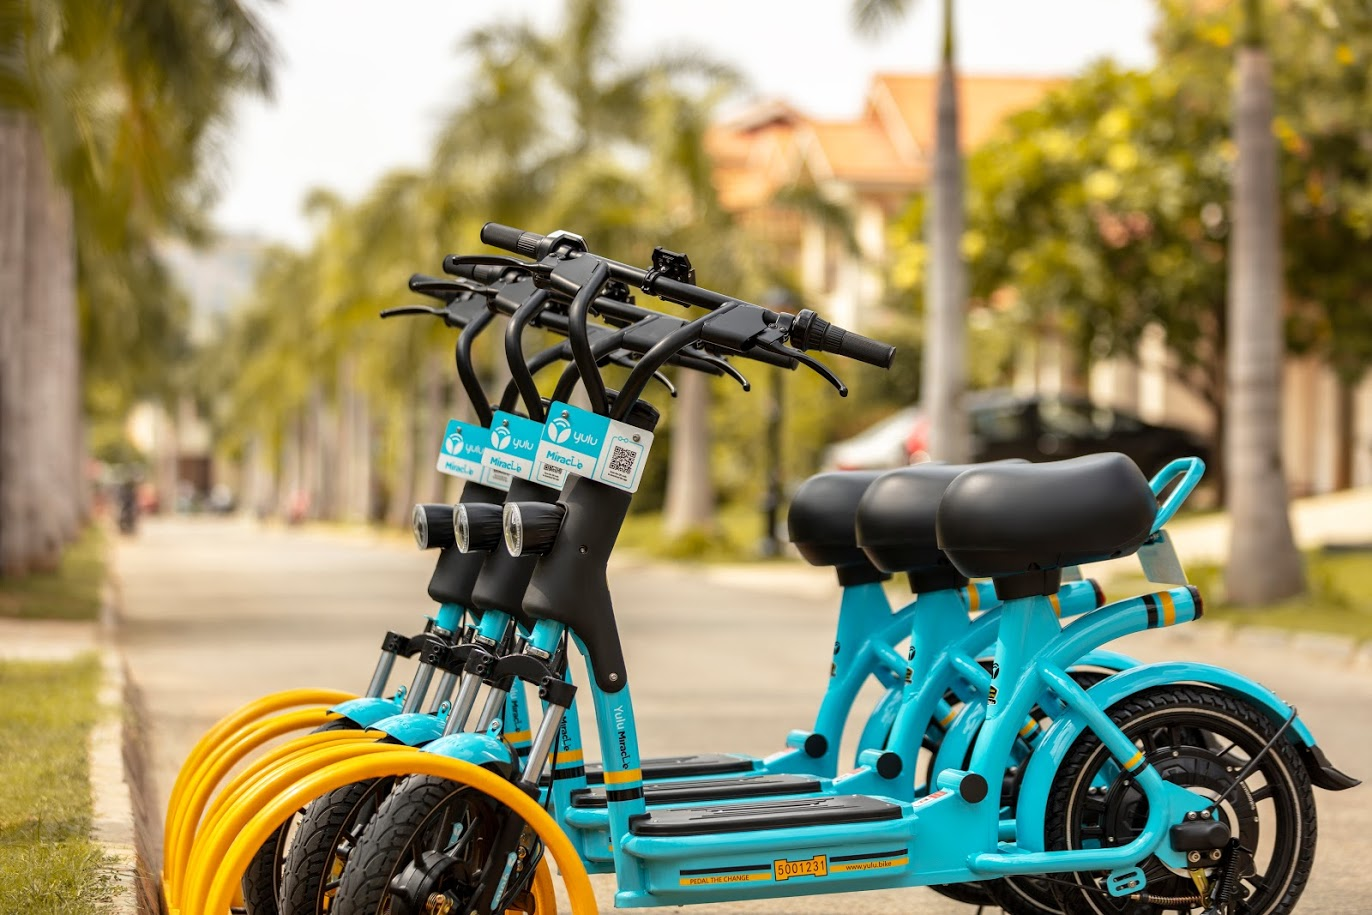

This project aims to forecast hourly bike rental demand in Seoul, South Korea. By analyzing historical rental data alongside environmental and temporal variables, the project seeks to optimize bike availability, enhance user experience, and improve operational efficiency for bike-sharing services like Yulu Bike.


# **Problem Statement**


In the context of urban mobility, bike-sharing systems have emerged as sustainable solutions to alleviate traffic congestion and reduce environmental impact. However, the effectiveness of these systems hinges on the ability to maintain a consistent and reliable supply of rental bikes to meet fluctuating demand patterns. The primary challenge lies in accurately predicting the number of bikes required at each hour to ensure availability and minimize user waiting times. This necessitates the development of predictive models that consider various influencing factors, including temporal variables (such as hour of the day and day of the week), weather conditions (like temperature, humidity, and precipitation), and special events (such as holidays). By leveraging historical data and machine learning techniques, the goal is to forecast hourly rental demand, enabling efficient fleet management, strategic bike redistribution, and enhanced user satisfaction. Addressing this challenge is critical for optimizing operational efficiency and promoting the adoption of eco-friendly transportation alternatives in urban settings.




## Data Overview
The dataset, sourced from the UCI Machine Learning Repository, encompasses hourly data collected over a year, from December 1, 2017, to November 30, 2018. It includes:

### Target Variable:

**Rented Bike Count**: Number of bikes rented per hour


### Features:

**Date**: Date of the record

**Hour**: Hour of the day (0–23)

**Temperature**: In Celsius

**Humidity**: Percentage (%)

**Wind Speed**: Meters per second (m/s)

**Visibility**: In 10 meters

**Dew Point Temperature**: In Celsius

**Solar Radiation**: MJ/m²

**Rainfall**: In millimeters (mm)

**Snowfall**: In centimeters (cm)

**Seasons**: Winter, Spring, Summer, Autumn

**Holiday**: Indicates if the day is a holiday

**Functional Day**: Indicates if the bike-sharing system was operational


This comprehensive dataset allows for the analysis of various factors affecting bike rental demand, such as weather conditions, time of day, and holidays.

# **GitHub Link -**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#data visualization libraries(matplotlib,seaborn, plotly)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import plotly.express as px

# Importing numpy, pandas
import pandas as pd
import numpy as np

# Datetime library for manipulating Date columns.
from datetime import datetime
import calendar

# for scaliing
from sklearn.preprocessing import StandardScaler

# for encoding purpose
from sklearn.preprocessing import  LabelEncoder

# Importing various machine learning models.
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from lightgbm import LGBMRegressor
import lightgbm


# XGB regressor.
from xgboost import XGBRegressor

#calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# spilitting data
from sklearn.model_selection import train_test_split

#for optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Import different metrics from sci-kit libraries for model evaluation.
from sklearn import metrics
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error


# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
filepath = "/content/SeoulBikeData.csv"

dfb = pd.read_csv(filepath,encoding='ISO-8859-1')

### Dataset First View

In [ ]:
# Dataset First Look
dfb.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows: {dfb.shape[0]}")
print(f"Number of columns: {dfb.shape[1]}")

Number of rows: 8760
Number of columns: 14


### Dataset Information

In [ ]:
# Dataset Info
dfb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
dfb.duplicated().sum().any()

np.False_

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
dfb.isnull().sum().any()

np.False_

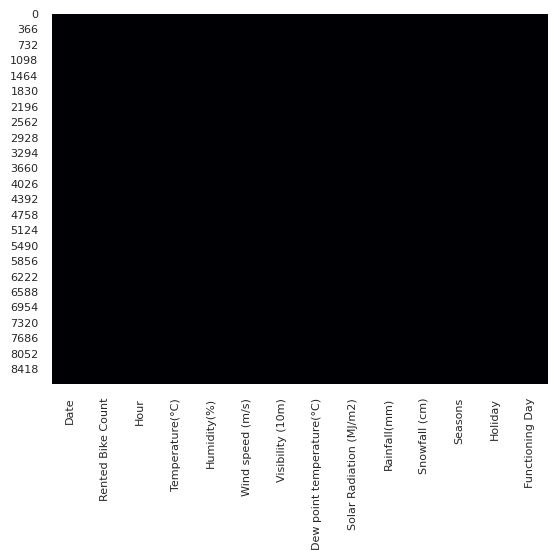

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the missing values
sns.heatmap(dfb.isnull(), cbar=False, cmap="inferno")

# smaller font size for tick labels
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()


visualisation looks empty, because no null values in dataset

### What did you know about your dataset?

> * The dataset has total number of 8760 values with 14 different features. Luckily, there are no null values and duplicate values.
> * There are 10 numerical [ 'Rented_Bike_Count', 'Hour', 'Temperature(°C)', 'Humidity', 'Wind_speed',  'Visibility ', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall' ] and 4 categorial feature ('Date', 'Seasons', 'Holiday', 'Functioning_Day').
> * However, date has data type of object which should be further treated to have correct data type and as per data description hour represents timestamp.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dfb.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

column names having unit names included in the dataset,for easy handling of data we remove the unit name.


In [ ]:
dfb.rename({"Temperature(°C)": "Temperature",
               "Functioning Day":"Functioning_Day",
                "Humidity(%)": "Humidity",
                "Wind speed (m/s)": "Wind_speed",
                "Visibility (10m)": "Visibility",
                "Dew point temperature(°C)": "Dew_point_temperature",
                "Solar Radiation (MJ/m2)": "Solar_Radiation",
                "Snowfall (cm)": "Snowfall",
                "Rainfall(mm)": "Rainfall",
                "Rented Bike Count": "Rented_Bike_Count"},
                axis = "columns", inplace = True)

In [ ]:
dfb.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

In [ ]:
# Dataset Describe
dfb.describe()

Rented_Bike_Count         Hour  Temperature     Humidity   Wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.250000    22.500000    74.000000     2.300000   
max          3556.000000    23.000000    39.400000    98.000000     7.400000   

        Visibility  Dew_point_temperature  Solar_Radiation     Rainfall  \
count  8760.000000            8760.000000      8760.000000  8760.000000   
mean   1436.825799               4.073813         0.569111     0.148687   
std     608.298712              13.060369         0.868746     1.128193   
min      27.000000             -30.600000         0.000000     0.000000   
25%     940.000000              -4.700000         0.000000     0.000000   
50%    1698.000000               5.100000         0.010000     0.000000   
75%    2000.000000              14.800000         0.930000     0.000000   
max    2000.000000              27.200000         3.520000    35.000000   

          Snowfall  
count  8760.000000  
mean      0.075068  
std       0.436746  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       8.800000

* We may not need to perform extensive data cleansing because the ranges of values in the numerical columns appear fair as well. However,columns like **Wind speed** , **Dew_point_temperature**, **Solar Radiation**, **Rainfall** and **Snowfall** appears to be skewed as their **median** (50 percentile) is much **lower** than the **highest value**.

### Variables Description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
dfb.nunique()

Date                      365
Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
dtype: int64

## 3. ***Data Wrangling***

In [ ]:
# making a copy od df and name it as dfb
df = dfb.copy()

In [ ]:
import pandas as pd
import calendar

# Correctly parse Date in day/month/year format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Extract month as abbreviation (e.g., Jan)
df['month'] = df['Date'].dt.month.apply(lambda x: calendar.month_abbr[x] if pd.notnull(x) else None)

# Extract day name (e.g., Thursday)
df['day'] = df['Date'].dt.day_name()

# Extract year
df['year'] = df['Date'].dt.year

# Verify the first row
df.head(1)


Date  Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   

  Seasons     Holiday Functioning_Day month     day  year  
0  Winter  No Holiday             Yes   Dec  Friday  2017

In [ ]:
# dropping Date column
df.drop(columns=['Date'],inplace=True)
df.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month     day  year  
0  No Holiday             Yes   Dec  Friday  2017

here hour feature has numerical value but it explains timesetamp.

In [ ]:
# converting hour feature into categorial by changing is type
df['Hour']=df['Hour'].astype('object')

In [ ]:
df['year'] = df['year'].astype('object')

In [ ]:
# final dataset for starting visualisations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   object 
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  month                  8760 non-null   object 
 14  day                    8760 non-null   object 
 15  year

# Exploratory Data Analysis(EDA) :

inorder to find the necessary relationship between variables we use EDA.to achieve this we use univariate analysis,bivariate analysis,multivariate analysis on the variables.

In [ ]:
# creating a copy of df as dfv
dfv = df.copy()

In [ ]:
# storing numerical feature in a different vairable for analyis
num_feature = dfv.select_dtypes(include='number')
print(num_feature.columns)

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')


In [ ]:
# storing categorical feature in a different variable for analysis
cat_feature = dfv.select_dtypes(exclude='number')
print(cat_feature.columns)

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month', 'day',
       'year'],
      dtype='object')


## ***4.Hypothesis Testing(Non parametric)***

  ### Test 1: Holiday vs Non-Holiday Rentals
Test Used: Mann-Whitney U Test

Purpose: To check if bike rentals differ significantly between holidays and non-holidays.

Do people rent significantly more or fewer bikes on holidays compared to non-holidays?

**Null Hypothesis (H₀)**: There is no significant difference in bike rentals between holidays and non-holidays.

**Alternate Hypothesis (H₁)**: There is a significant difference in bike rentals between holidays and non-holidays.

In [ ]:
from scipy.stats import mannwhitneyu

holiday = dfv[dfv['Holiday'] == 'Holiday']['Rented_Bike_Count']
non_holiday = dfv[dfv['Holiday'] == 'No Holiday']['Rented_Bike_Count']

stat1, p1 = mannwhitneyu(holiday, non_holiday, alternative='two-sided')
print(f"Test Statistic: {stat1}, p-value: {p1}")

Test Statistic: 1364325.0, p-value: 2.279911048361832e-17


In [ ]:
if p1 < 0.05:
    print("Reject H₀: Significant difference in rentals between holidays and non-holidays.")
else:
    print("Fail to Reject H₀: No significant difference in rentals between holidays and non-holidays.")


Reject H₀: Significant difference in rentals between holidays and non-holidays.


### Test 2: Temperature vs Bike Rentals

Test Used: Spearman Correlation

Purpose: To check if there's a monotonic relationship between temperature and bike rentals.

Does temperature influence the number of bike rentals?

**Null Hypothesis (H₀)**: There is no monotonic relationship between temperature and bike rentals.

**Alternate Hypothesis (H₁)**: There is a monotonic relationship between temperature and bike rentals.

In [ ]:
from scipy.stats import spearmanr

stat2, p2 = spearmanr(dfv['Temperature'], dfv['Rented_Bike_Count'])
print(f"Test Statistic: {stat2}, p-value: {p2}")

Test Statistic: 0.5646753494036663, p-value: 0.0


In [ ]:
if p2 < 0.05:
    print("Reject H₀: Temperature has a significant monotonic relationship with rentals.")
else:
    print("Fail to Reject H₀: No significant monotonic relationship between temperature and rentals.")


Reject H₀: Temperature has a significant monotonic relationship with rentals.


   ### Test 3: Rentals Across Seasons
Test Used: Kruskal-Wallis H-Test

Purpose: To test whether the distribution of rentals differs across seasons.



Do different seasons impact the number of rentals?

**Null Hypothesis (H₀)**: The distributions of rentals are the same across all seasons.

**Alternate Hypothesis (H₁)**: At least one season has a different rental distribution.

In [ ]:
from scipy.stats import kruskal

groups = [group['Rented_Bike_Count'].values for name, group in dfv.groupby('Seasons')]
stat3, p3 = kruskal(*groups)
print(f"Test Statistic: {stat3}, p-value: {p3}")

Test Statistic: 2095.900788061784, p-value: 0.0


In [ ]:
if p3 < 0.05:
    print("Reject H₀: Significant difference in rentals across seasons.")
else:
    print("Fail to Reject H₀: No significant difference in rentals across seasons.")

Reject H₀: Significant difference in rentals across seasons.


**Results:**

**plot 1**: number of rentals is not the same on holidays as it is on non-holidays.

**plot 2**: it means that colder temperatures are associated with fewer rentals, and warmer temperatures are associated with more rentals.

**plot 3**: demand for rentals changes notably and predictably depending on the time of year (e.g., Spring, Summer, Autumn, Winter).

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

univariate analysis:

None


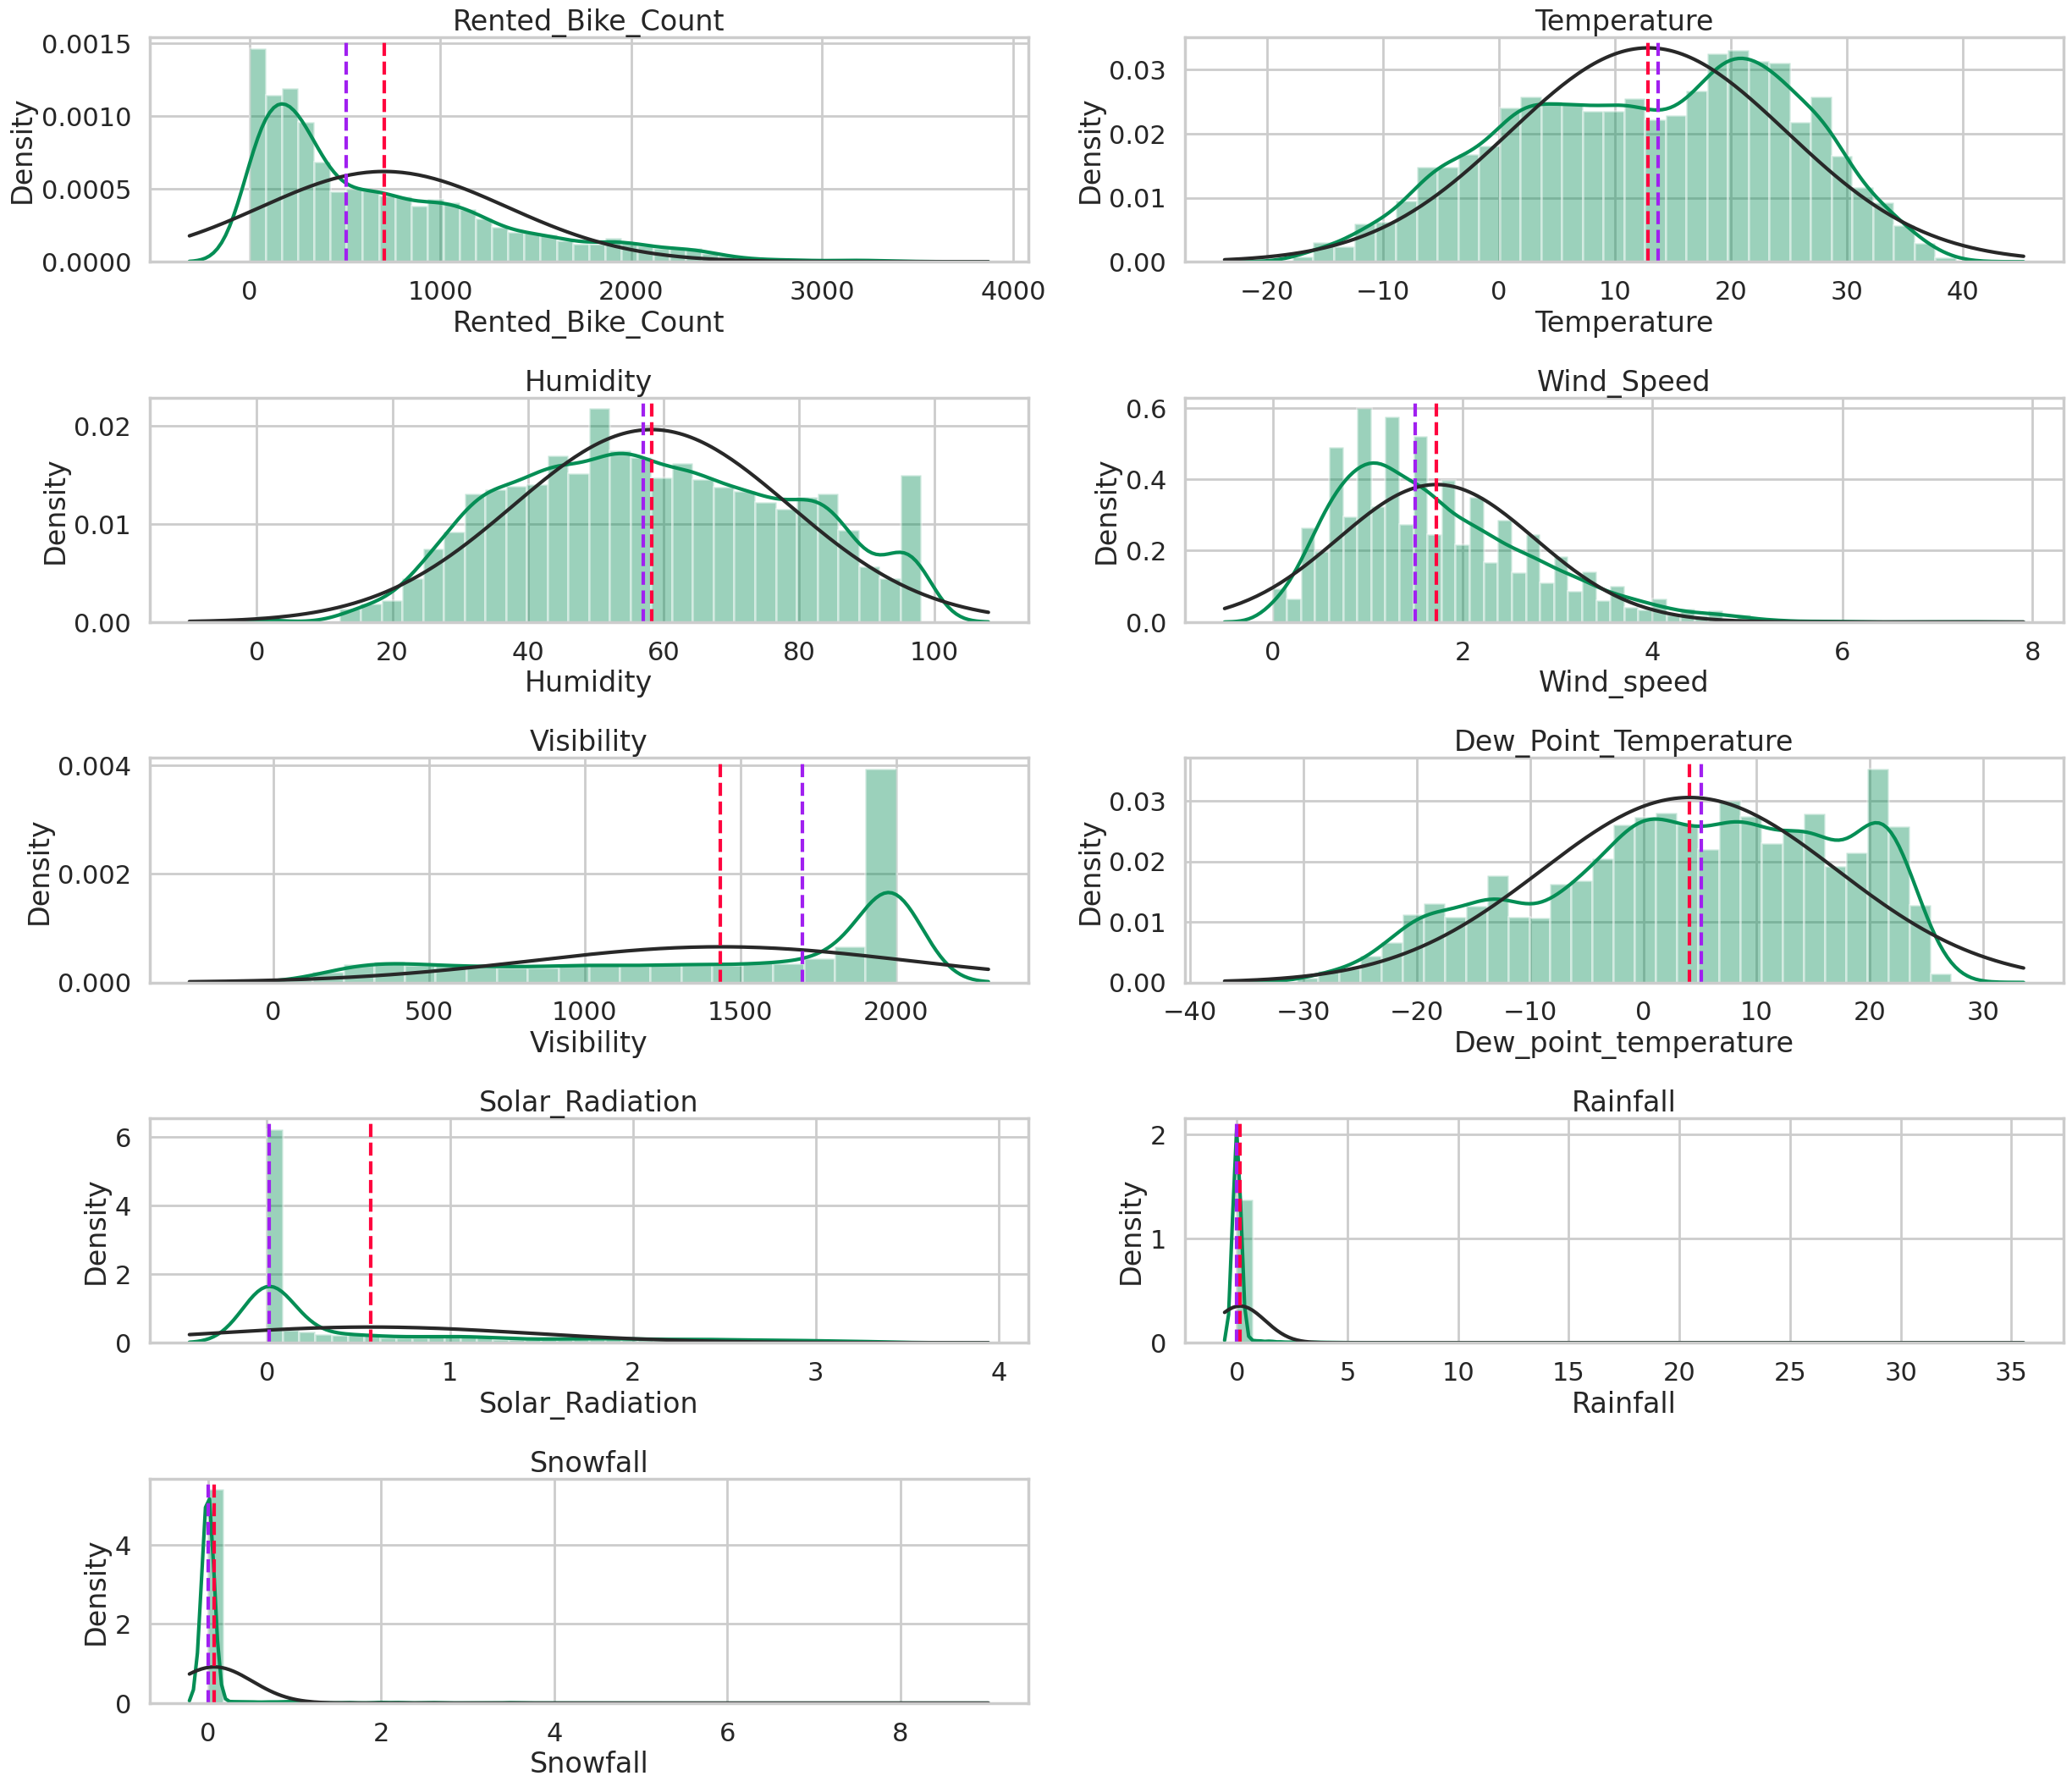

In [ ]:
#analysing numerical value using density plot with mean and median
def density_plot(dfv,num_feature):
  graph = plt.figure(figsize = (25,25))

  for i,col in enumerate(num_feature) :
    sns.set_context('poster');
    plt.subplot(6,2,i+1);
    sns.distplot(dfv[col], color = '#058E55', fit = norm);
    feature = dfv[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #Rose-Red Color indicate mean of data
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #Cyan indicate median of data
    plt.title(f'{col.title()}');
    plt.tight_layout();
print(density_plot(dfv,num_feature))

* From the above graph we can summarise that:
  
  **Right**/Positive Skewed Distribution: Mode < Median < Mean: **Rented_Bike_Count**, **Wind_speed**, **Solar Radiation**

  **No Skew**: Mean = Median = Mode : **Hour**, **Temperature**, **Humidity**,**Rainfall**,**Snowfall**

  **Left**/Negative Skewed Distribution: Mean < Median < Mode: **visibility**

Bivariate analyis

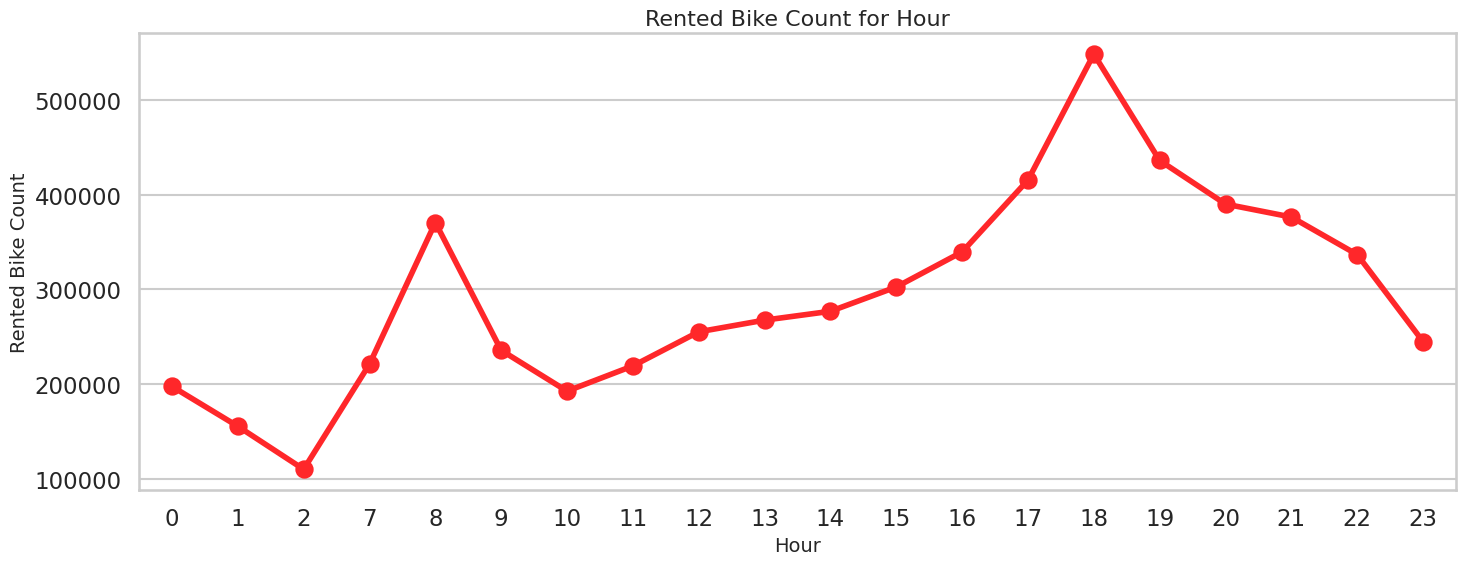

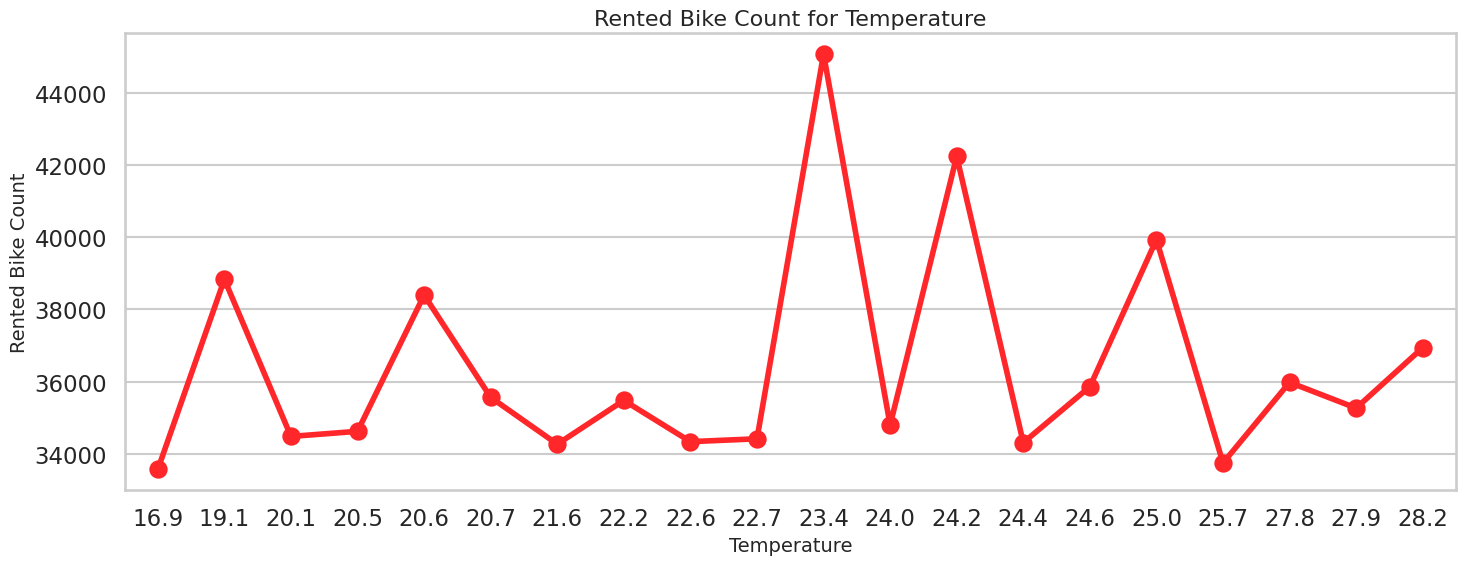

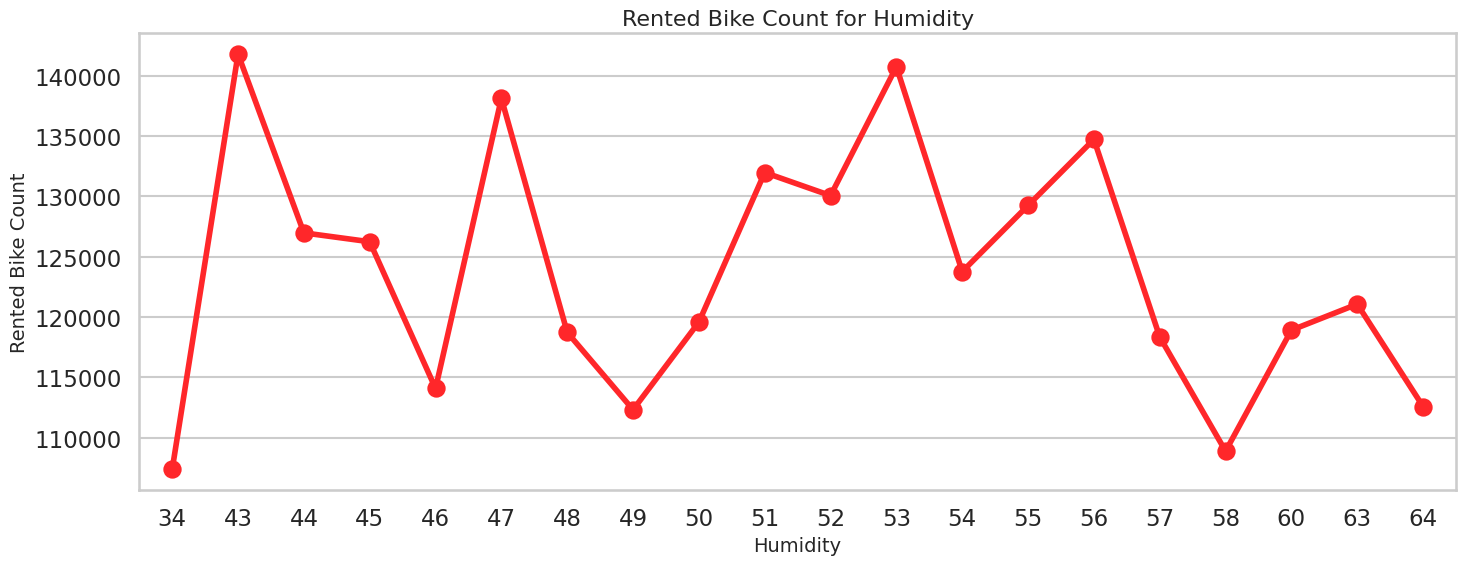

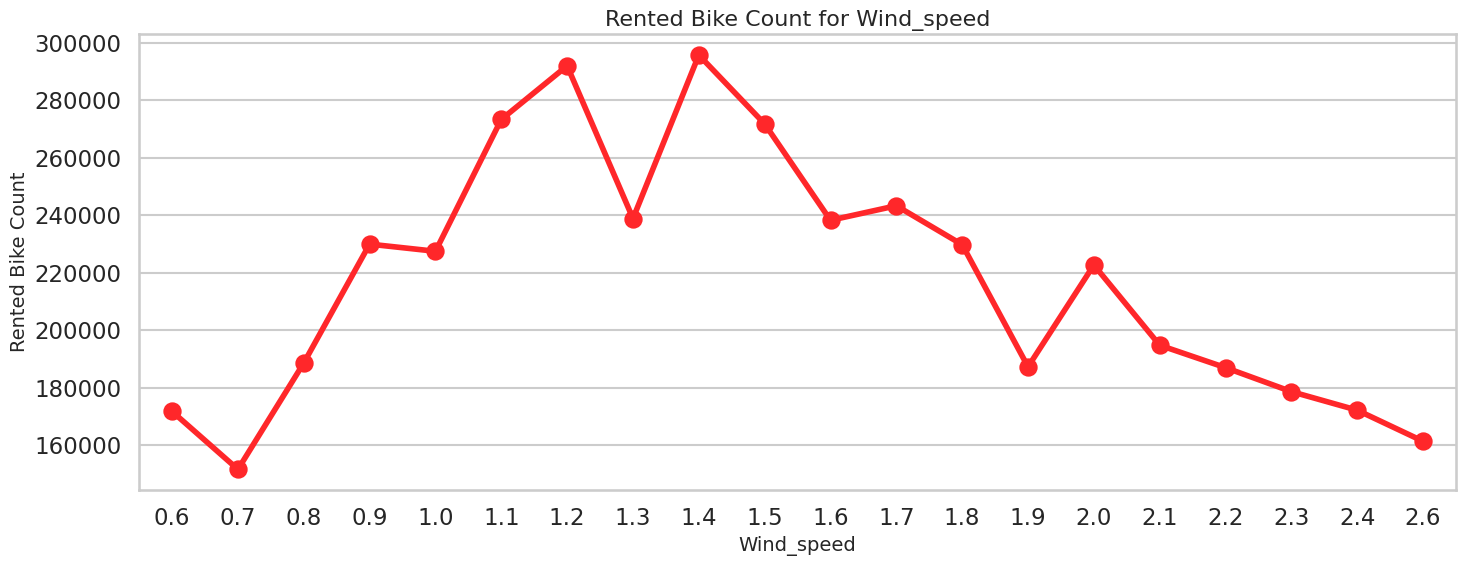

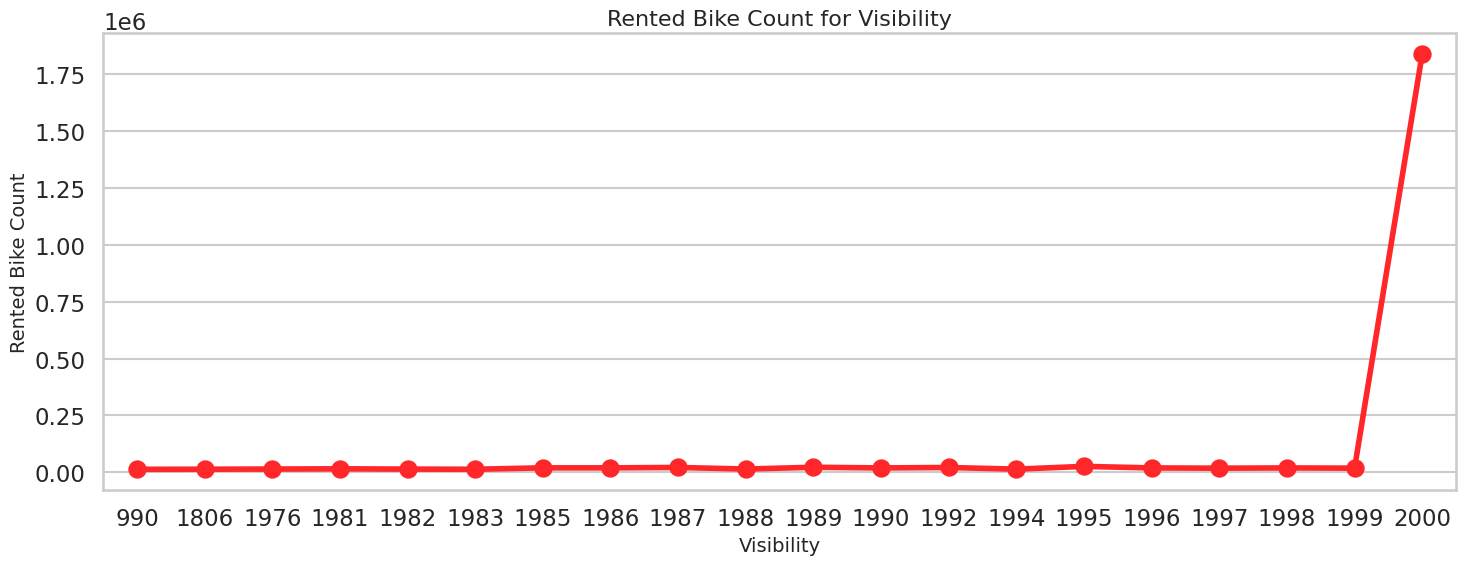

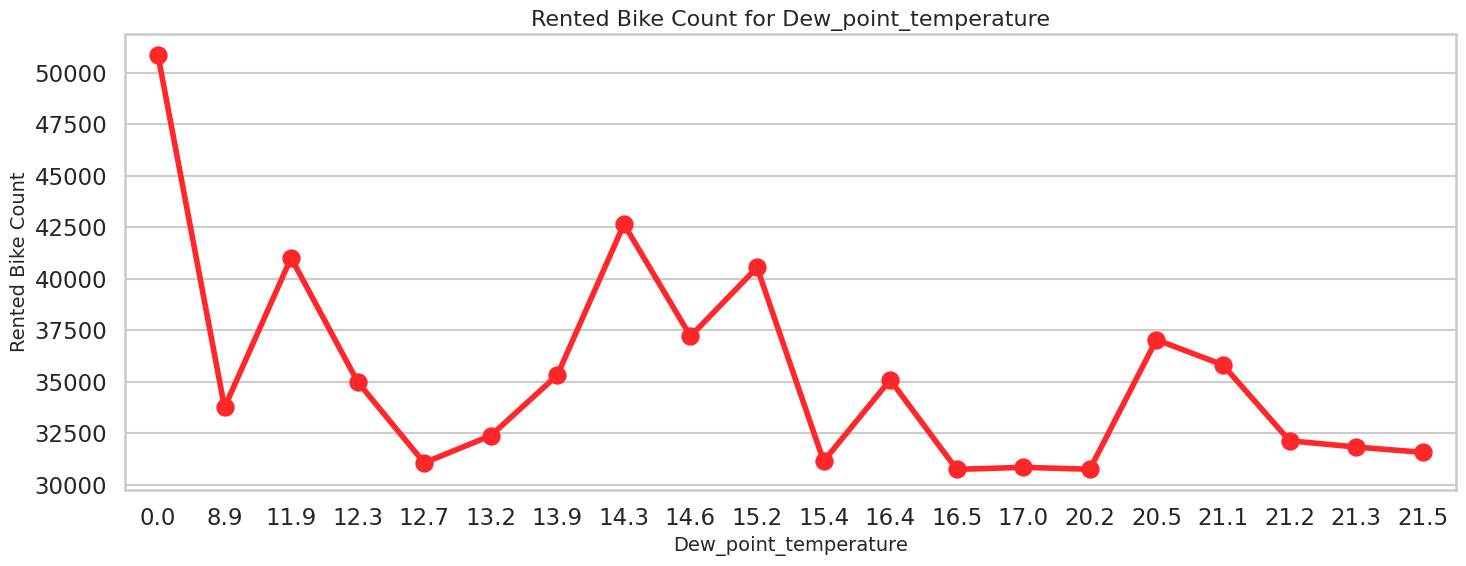

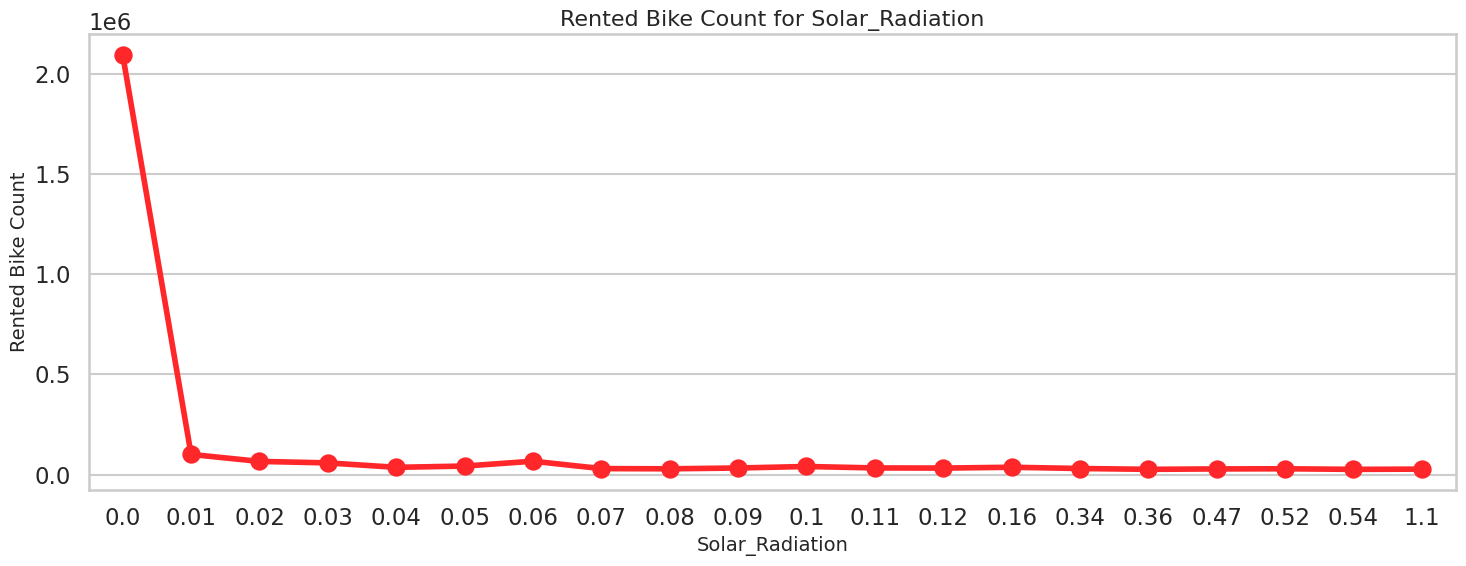

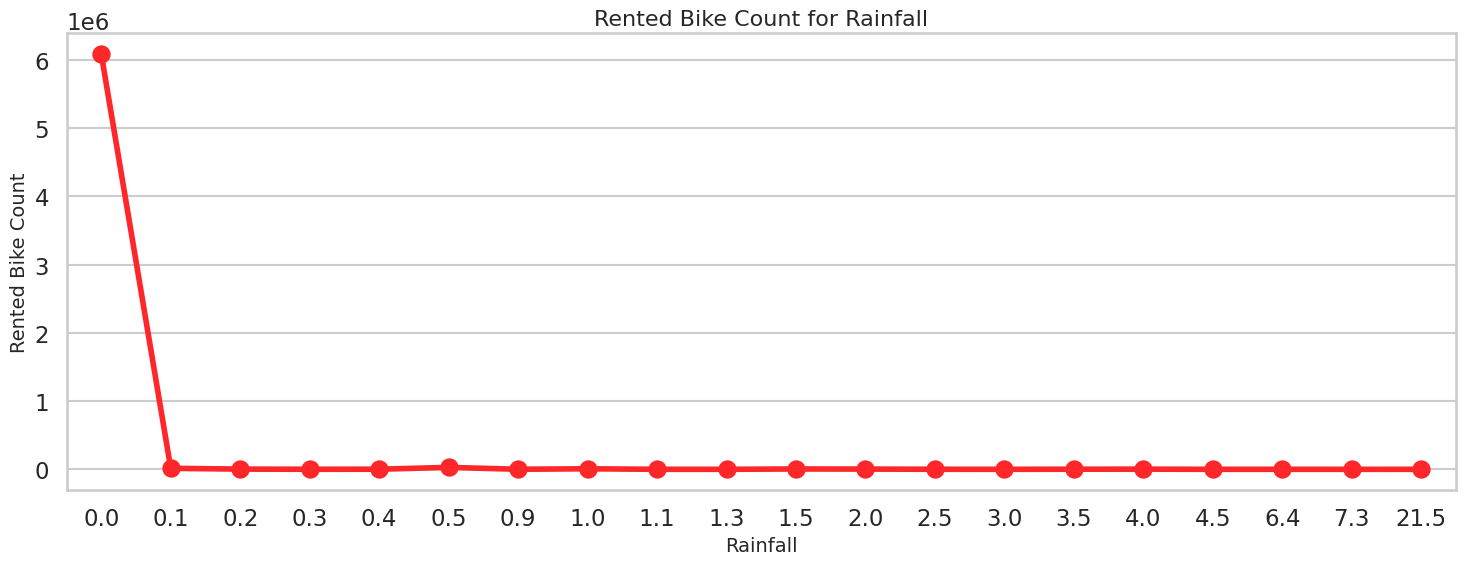

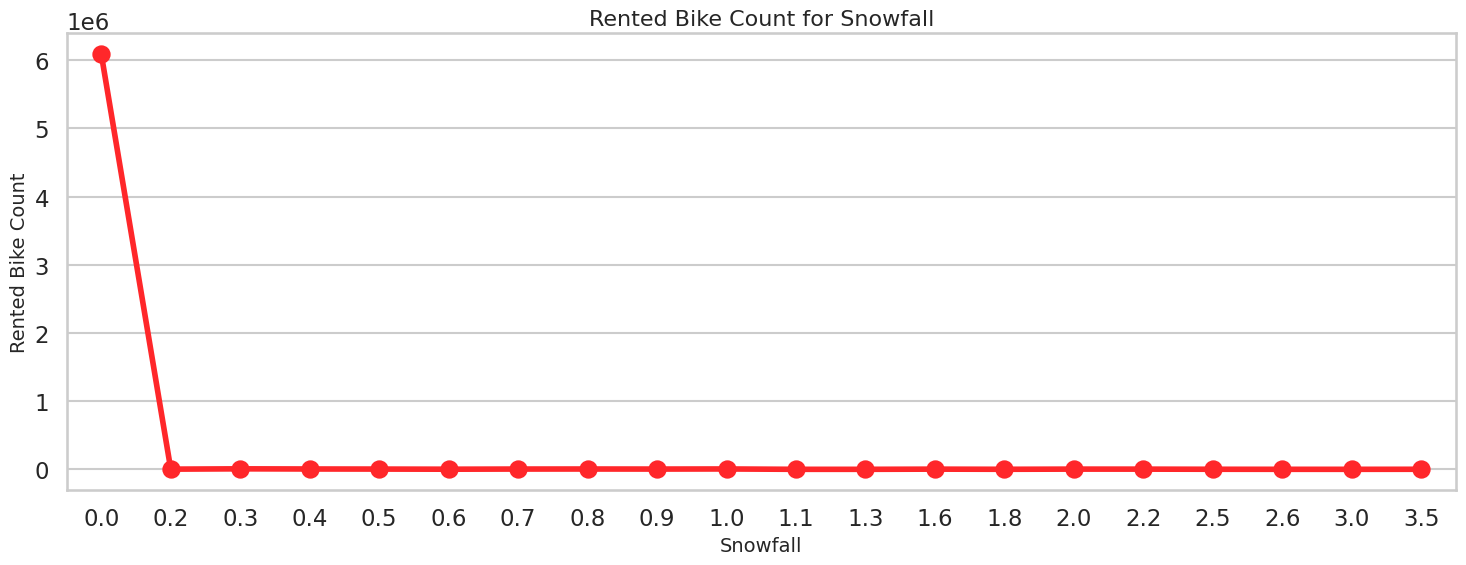

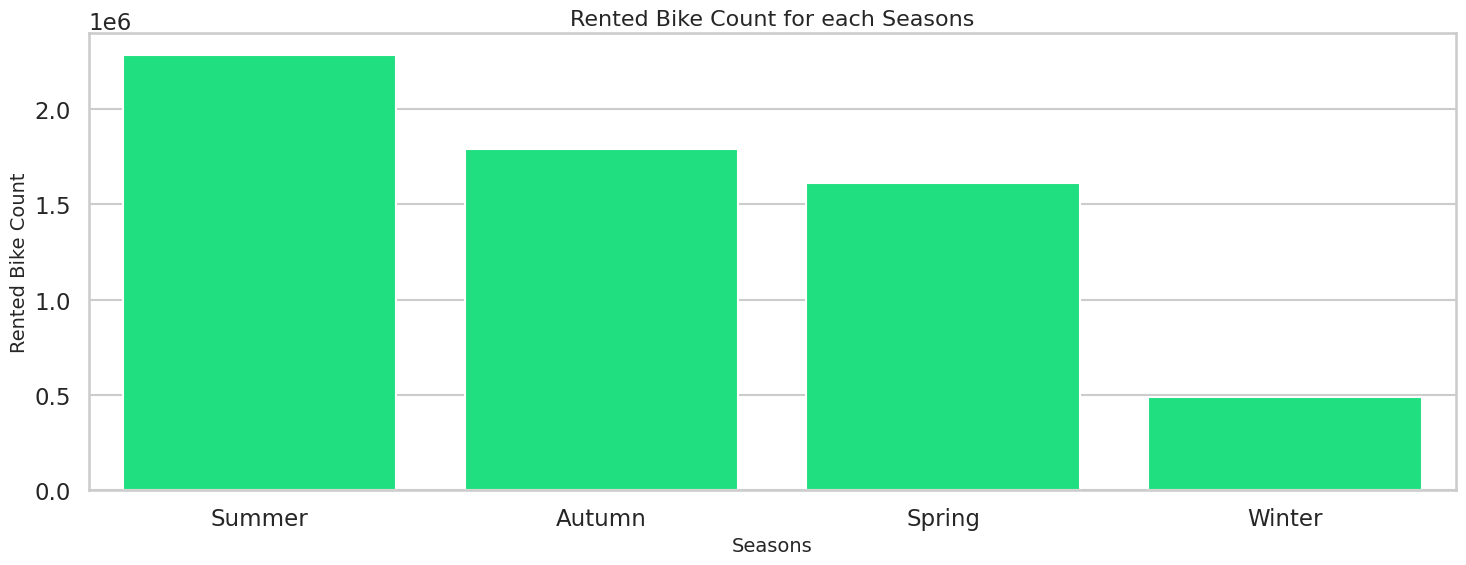

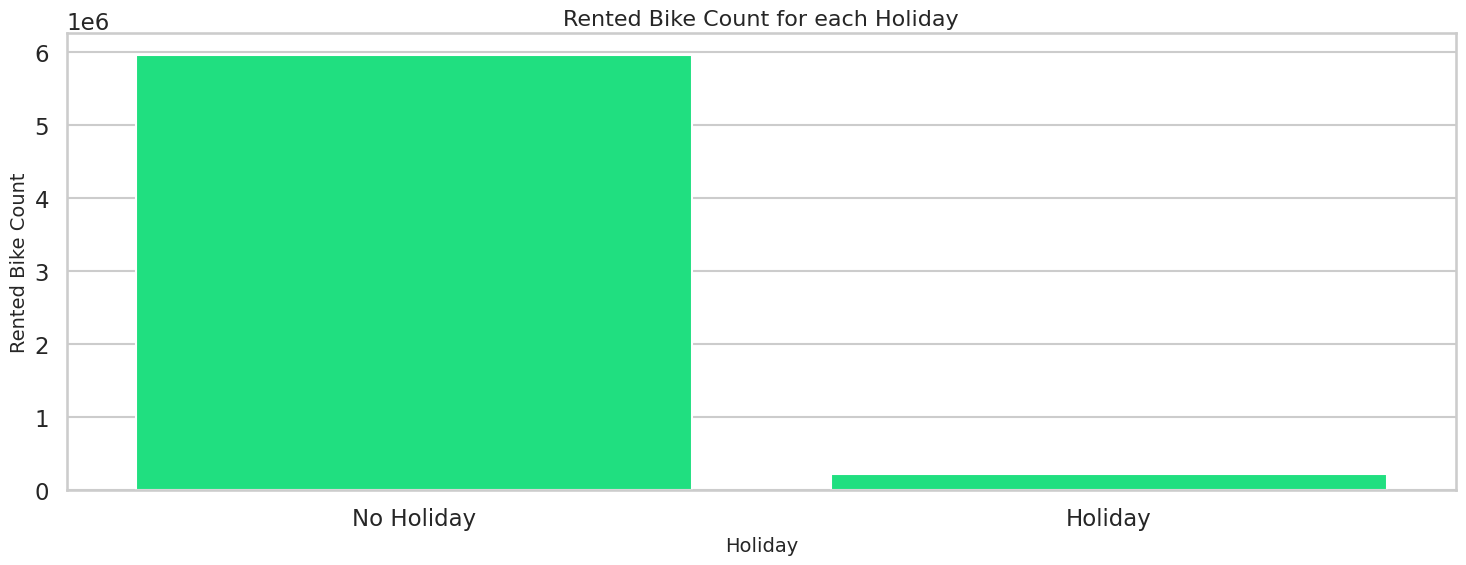

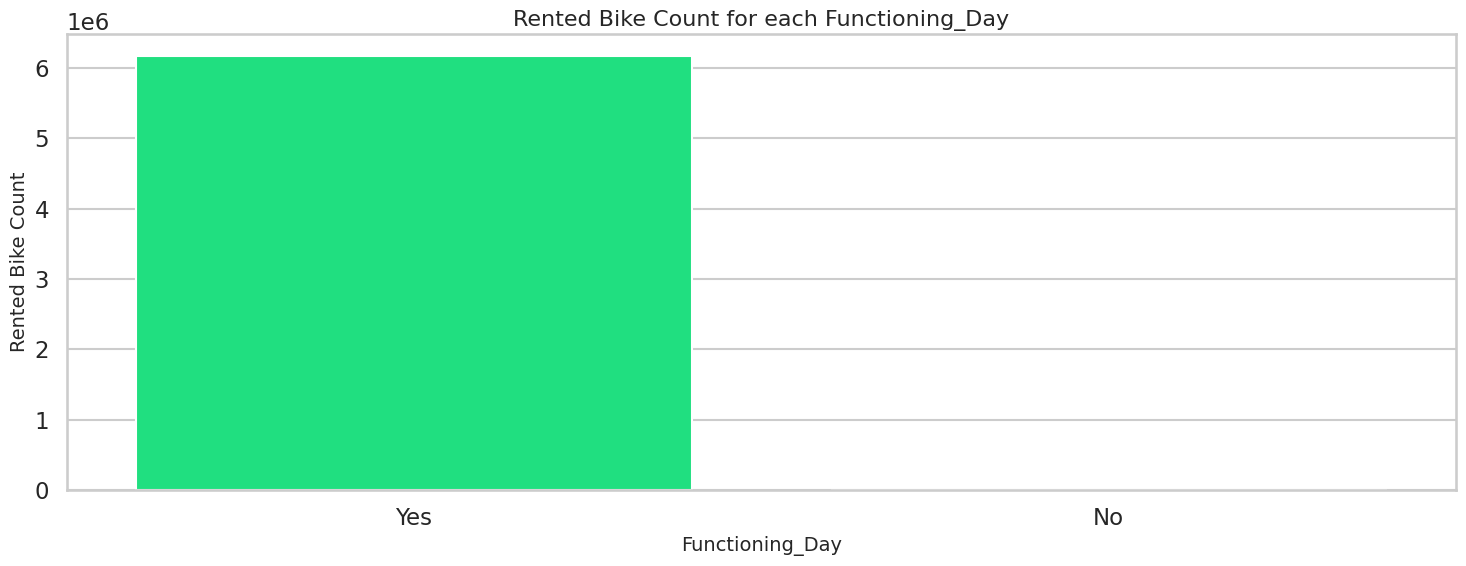

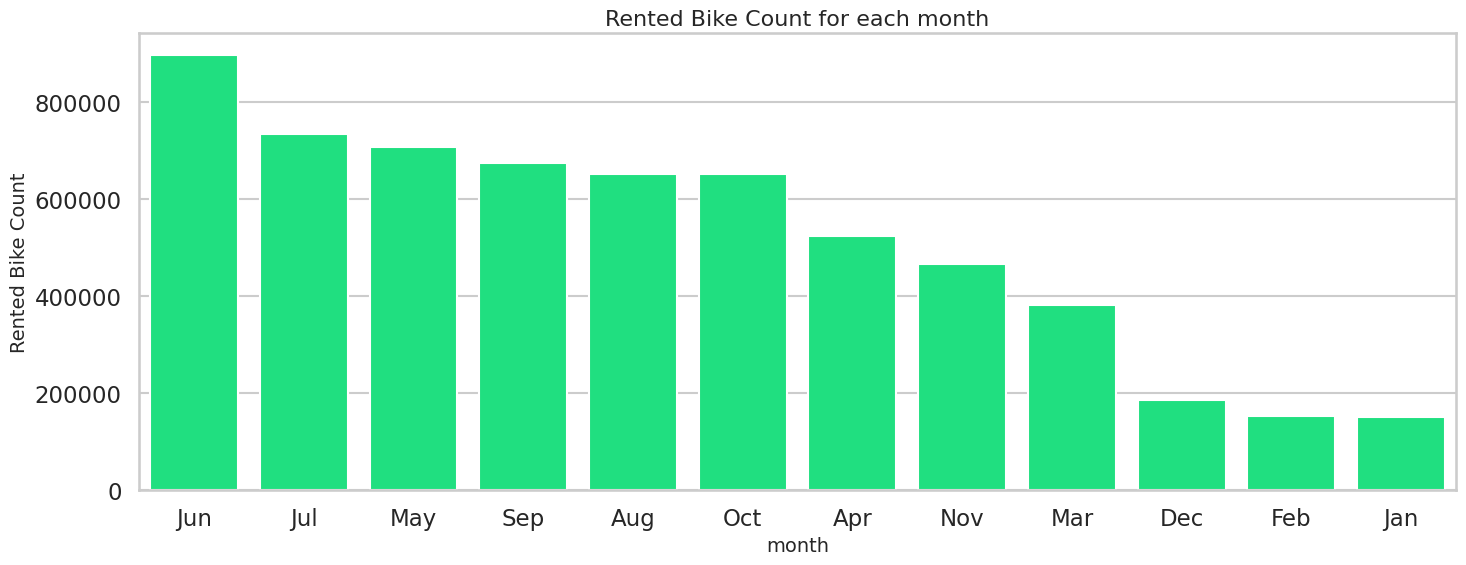

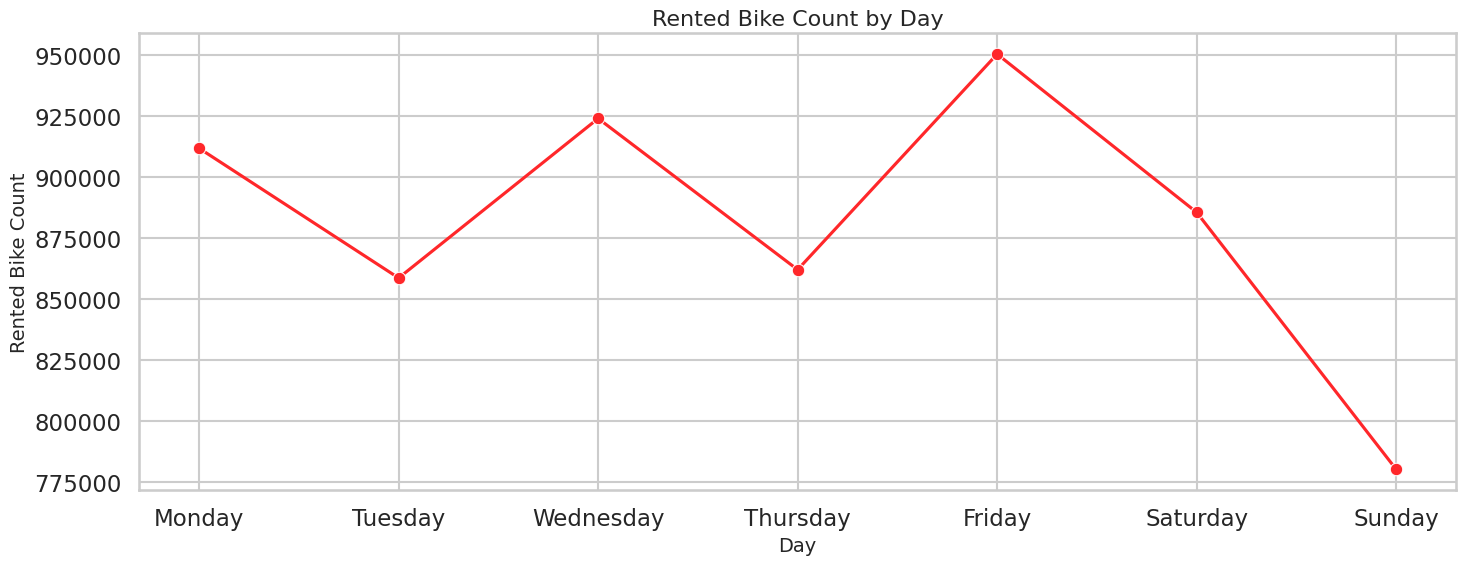

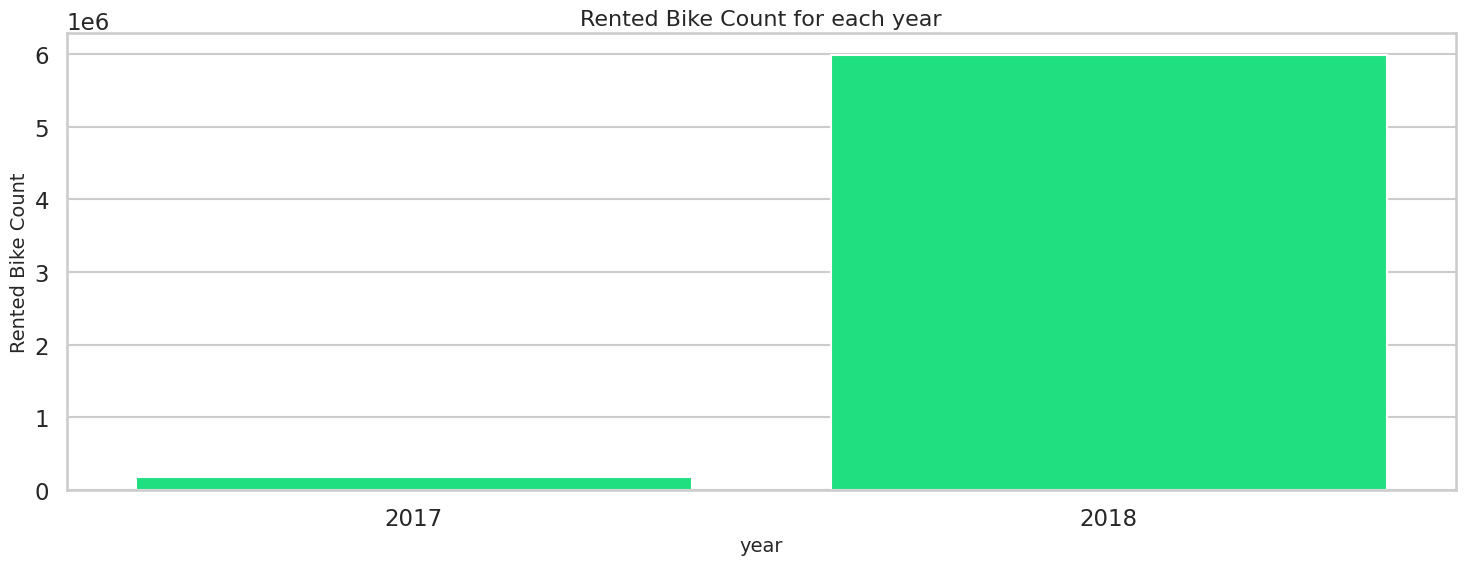

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define the color palette
primary_color = '#00ff80'  # Cyan-Lime Green
accent_color = '#FF272A'   # Vibrant Red

# Set Seaborn style
sns.set(style="whitegrid", context="talk")

# List of columns to exclude from plotting
exclude_cols = ['Rented_Bike_Count']

# Iterate through columns in the DataFrame
for i in dfv.columns:
    if i in exclude_cols:
        continue

    plt.figure(figsize=(15, 6))

    if i in ['Seasons', 'Holiday', 'Functioning_Day', 'month', 'year']:
        grp = dfv.groupby([i], as_index=False)['Rented_Bike_Count'].sum().sort_values(
            'Rented_Bike_Count', ascending=False
        )
        sns.barplot(x=grp[i], y=grp["Rented_Bike_Count"], color=primary_color)
        plt.title(f"Rented Bike Count for each {i}", fontsize=16)
        plt.xlabel(i, fontsize=14)
        plt.ylabel("Rented Bike Count", fontsize=14)

    elif i == 'day':
        # Ensure 'day' column is ordered correctly
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        grp = dfv.groupby([i], as_index=False)['Rented_Bike_Count'].sum()
        grp['day'] = pd.Categorical(grp['day'], categories=day_order, ordered=True)
        grp = grp.sort_values('day')
        sns.lineplot(data=grp, x='day', y='Rented_Bike_Count', marker='o', color=accent_color)
        plt.title("Rented Bike Count by Day", fontsize=16)
        plt.xlabel("Day", fontsize=14)
        plt.ylabel("Rented Bike Count", fontsize=14)

    else:
        grp = dfv.groupby([i], as_index=False)['Rented_Bike_Count'].sum().sort_values(
            'Rented_Bike_Count', ascending=False
        ).head(20)
        sns.pointplot(x=grp[i], y=grp["Rented_Bike_Count"], color=accent_color)
        plt.title(f"Rented Bike Count for {i}", fontsize=16)
        plt.xlabel(i, fontsize=14)
        plt.ylabel("Rented Bike Count", fontsize=14)

    plt.tight_layout()
    plt.show()


For features like year, Functioning_Day, holiday and season, it can be categorised as 2 or 4 category. Therefore, it is better to check their values again separately, specially with Functioning_Day and holiday.

In [ ]:
#groupby function for finding sum with respect to categorial features
def group_by(df,feature):
  data = df.groupby([feature], as_index = False)['Rented_Bike_Count'].sum().sort_values('Rented_Bike_Count', ascending = False)
  return data

In [ ]:
#Rented_Bike_Count with respect to Functioning_Day
group_by(dfv,'Functioning_Day')

Functioning_Day  Rented_Bike_Count
1             Yes            6172314
0              No                  0

In [ ]:
#Rented_Bike_Count vs holiday
group_by(dfv,'Holiday')

Holiday  Rented_Bike_Count
1  No Holiday            5956419
0     Holiday             215895

In [ ]:
#Rented_Bike_Count with respect to year
group_by(dfv,'year')

year  Rented_Bike_Count
1  2018            5986984
0  2017             185330

In [ ]:
#Rented_Bike_Count with respect to season
group_by(dfv,'Seasons')

Seasons  Rented_Bike_Count
2  Summer            2283234
0  Autumn            1790002
1  Spring            1611909
3  Winter             487169

In [ ]:
#Rented_Bike_Count with respect to day
weekend = group_by(dfv,'day')
holy = weekend[(weekend['day'] == 'Saturday') | (weekend['day'] == 'Sunday')]
holy

day  Rented_Bike_Count
2  Saturday             885492
3    Sunday             780194

In [ ]:
#Rented_Bike_Count with respect to day
workingday = group_by(dfv,'day')
office = workingday[(workingday['day'] != 'Saturday') & (workingday['day'] != 'Sunday')]
office

day  Rented_Bike_Count
0     Friday             950334
6  Wednesday             923956
1     Monday             911743
4   Thursday             861999
5    Tuesday             858596

In [ ]:
#checking total bike rented count of workingday vs weekend
d = office['Rented_Bike_Count'].sum() > holy['Rented_Bike_Count'].sum()
print(f' Is it true that bike rented count is more on working day? {d}')

 Is it true that bike rented count is more on working day? True


* If it is a non Functioning_Day, total bike rented count is zero. Therefore, taking two approach to see which can give better result. First, with taking all values, secondly by removing nonfunctioning day value and then removing entire column. But, before taking any step it is better to find correlation of the column with our target( Rented_Bike_Count) column.

In [ ]:
copy_for_future = dfv.copy()
trial = dfv.copy()

In [ ]:
#changing yes-1 and no-0 for calculation of correlation
trial['Functioning_Day']= LabelEncoder().fit_transform(trial['Functioning_Day'])

In [ ]:
trial['Functioning_Day'].value_counts()

Functioning_Day
1    8465
0     295
Name: count, dtype: int64

In [ ]:
# finding correlation between functioning day and rented bike count
corr = trial[['Rented_Bike_Count','Functioning_Day']].corr()
corr

Rented_Bike_Count  Functioning_Day
Rented_Bike_Count           1.000000         0.203943
Functioning_Day             0.203943         1.000000

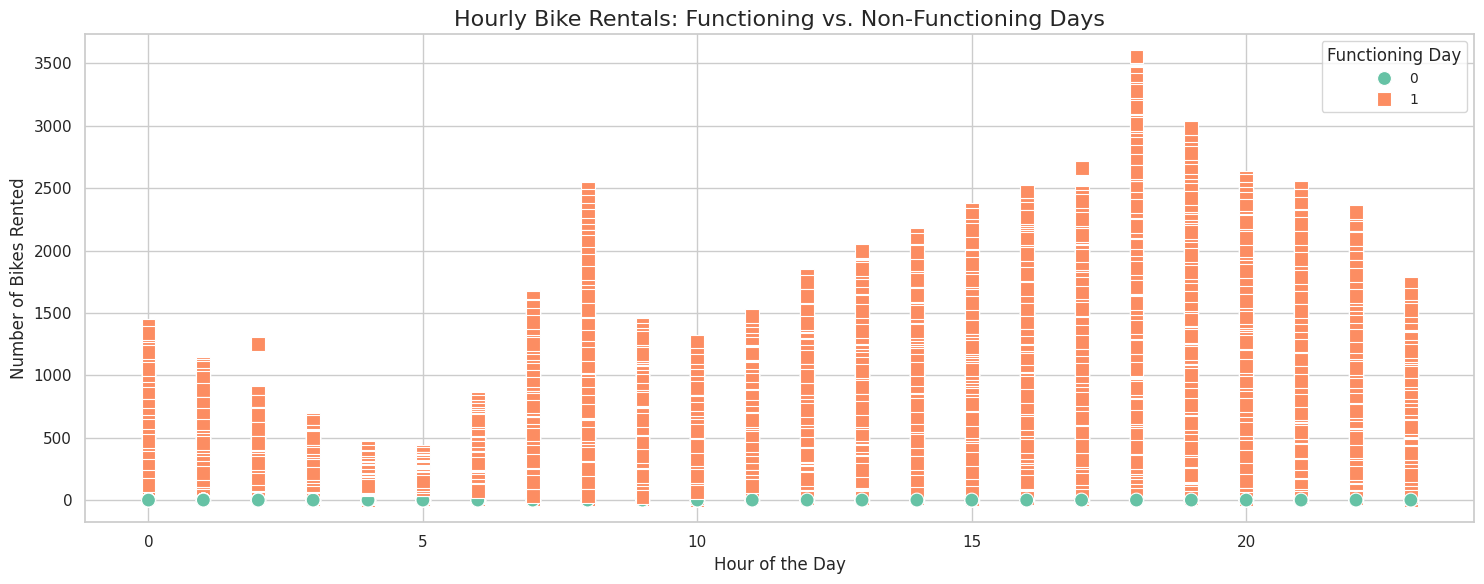

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a modern aesthetic style
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(15, 6))
sns.scatterplot(
    data=trial,
    x='Hour',
    y='Rented_Bike_Count',
    hue='Functioning_Day',
    palette='Set2',
    style='Functioning_Day',  # Different marker styles
    markers=['o', 's'],  # Define marker shapes
    s=100  # Set marker size
)

# Add informative titles and labels
plt.title('Hourly Bike Rentals: Functioning vs. Non-Functioning Days', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Bikes Rented', fontsize=12)

# Customize the legend
plt.legend(title='Functioning Day', title_fontsize=12, fontsize=10, loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


Hence from correlation, it is clear that functioning day show very low positive correlation of only 0.2, therefore will approaching the second method i.e., deleting the non functioning values.

In [ ]:
#Removing data of non functional days with no rented bike
value = dfv.drop(dfv[dfv['Functioning_Day'] == 'No'].index)

In [ ]:
value["Functioning_Day"].value_counts()

Functioning_Day
Yes    8465
Name: count, dtype: int64

In [ ]:
#Removing entire functional day column as it of no use
value = value.drop(['Functioning_Day'], axis = 1)
value.shape

(8465, 15)

In [ ]:
#shape of new dataset
print(f'Shape of original data: {copy_for_future.shape}')
print(f'Shape of new data : {value.shape}')

Shape of original data: (8760, 16)
Shape of new data : (8465, 15)


* From the above graph and analysis, it can be stated that
  1. If it is a non Functioning_Day, Rented_Bike_Count is zero.
  2. As seson changes from summer to winter, demand for bike decreases.
  3. Above point is also proved when month is plotted against bike demand, it is observed that demand gradually decreased as we moved from summer to winter and has lowest demand in Febuary.
  4. Bike demand on holiday is less than that on working day.
  5. Every week demand for bike gradually increases, however on weekend, one can see a less amount of demand, which further can help us in categorizing day as workingday and weekend.


Multivariate analysis:

In [ ]:
# Converting day of weeks in Two variable from Monaday to Friday in workingdays and Saturday and Sunday to Weekend
value['week'] = value['day'].apply(lambda x:'Weekend'  if x=='Saturday' or  x== 'Sunday' else 'workingdays')

In [ ]:
value.week.value_counts()

week
workingdays    6024
Weekend        2441
Name: count, dtype: int64

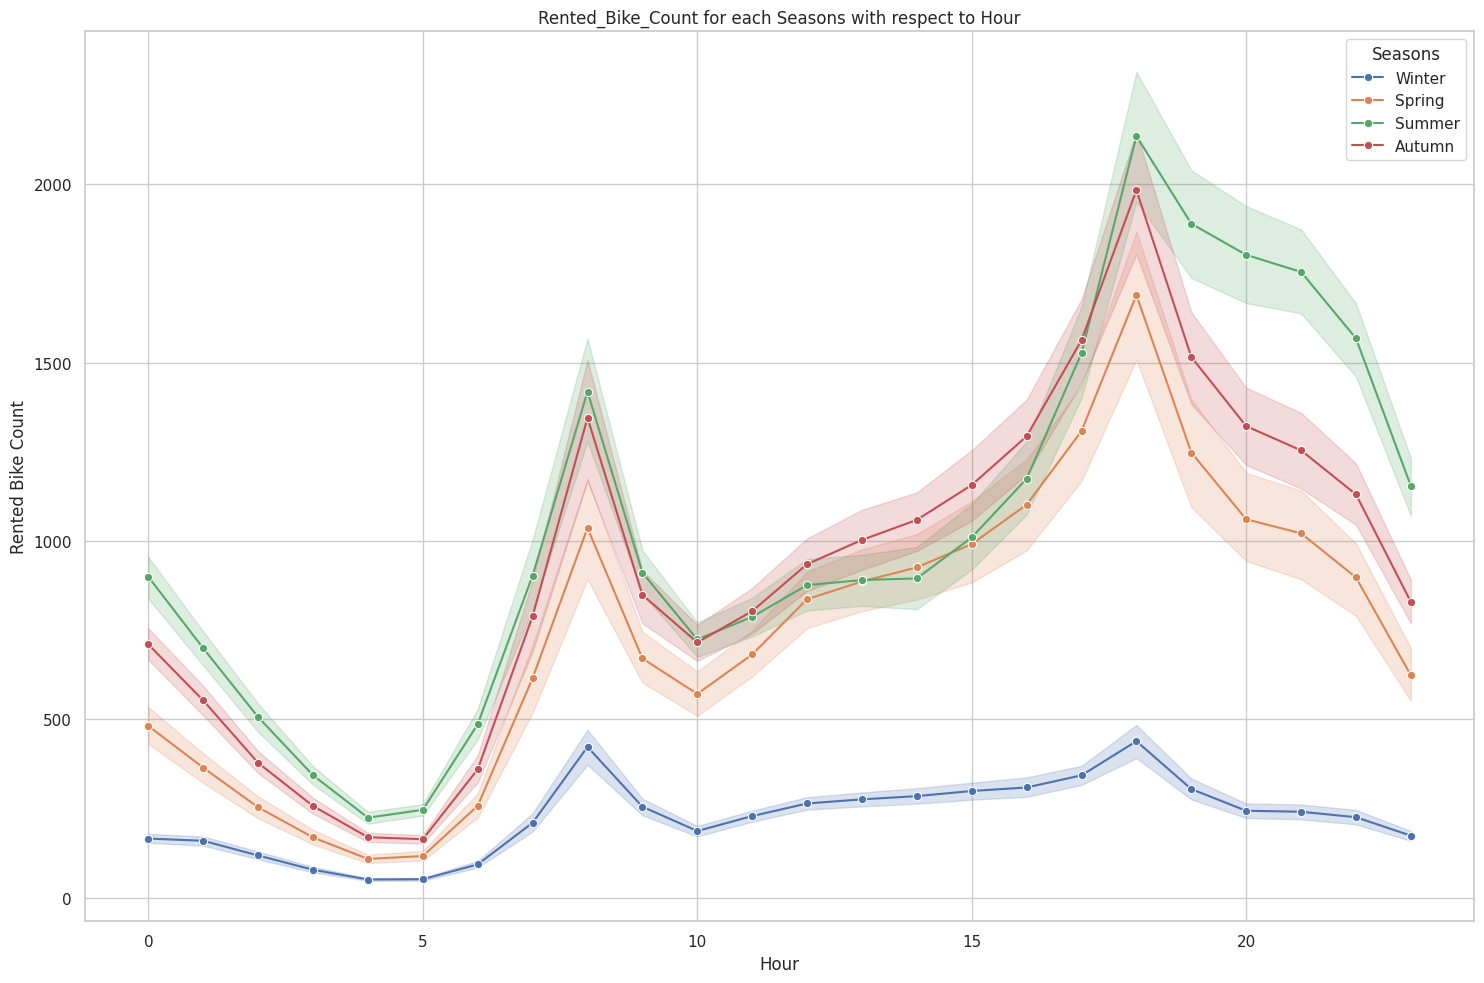

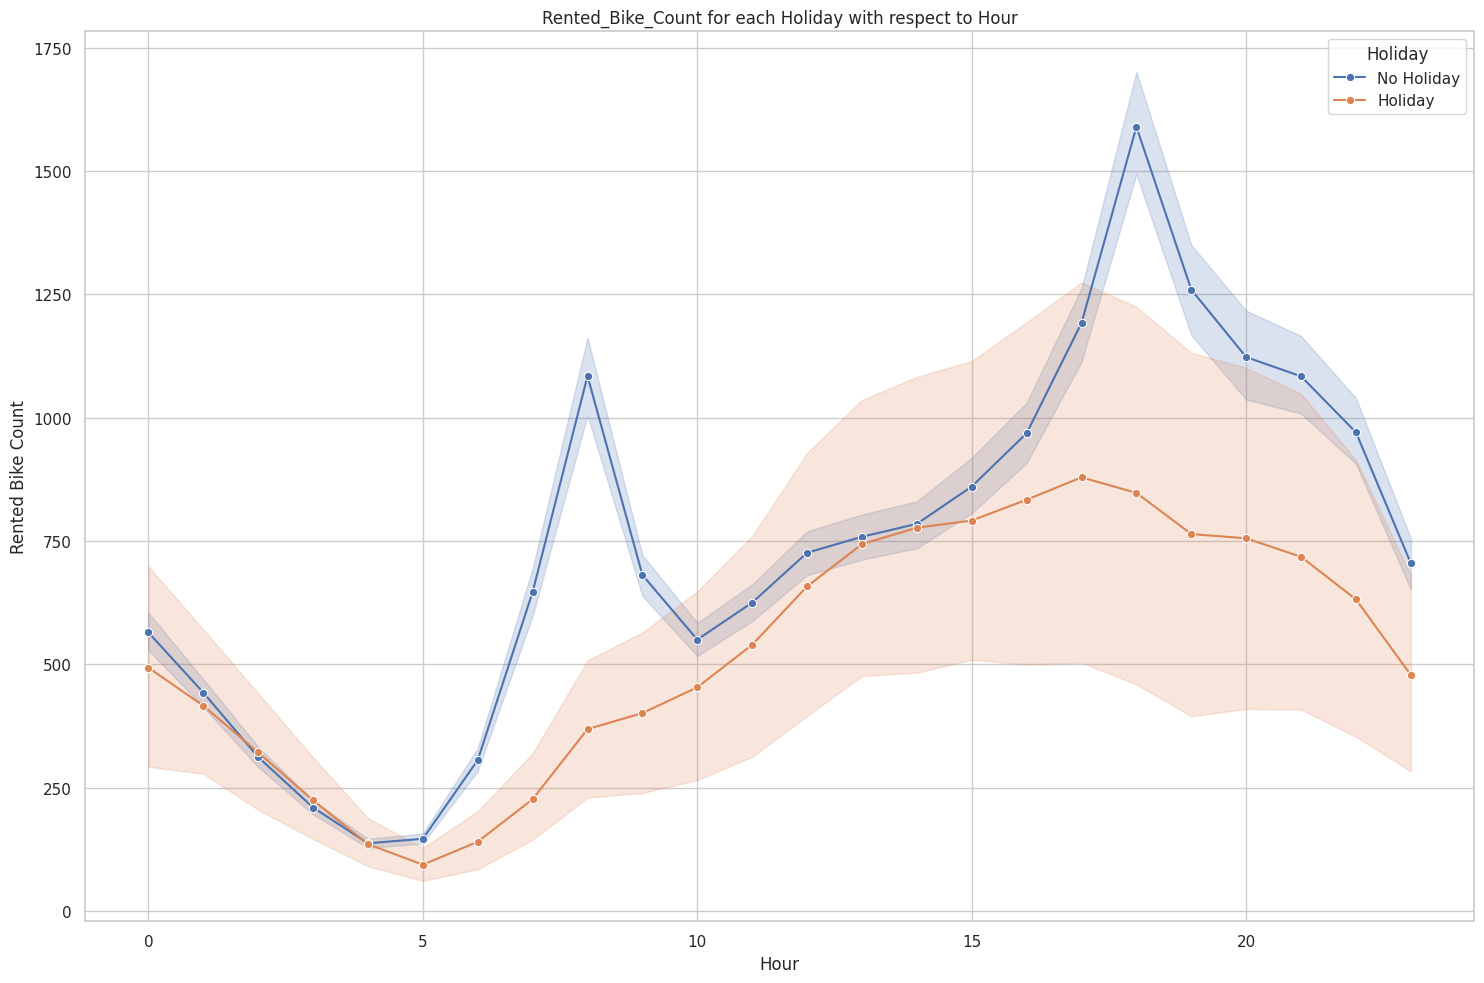

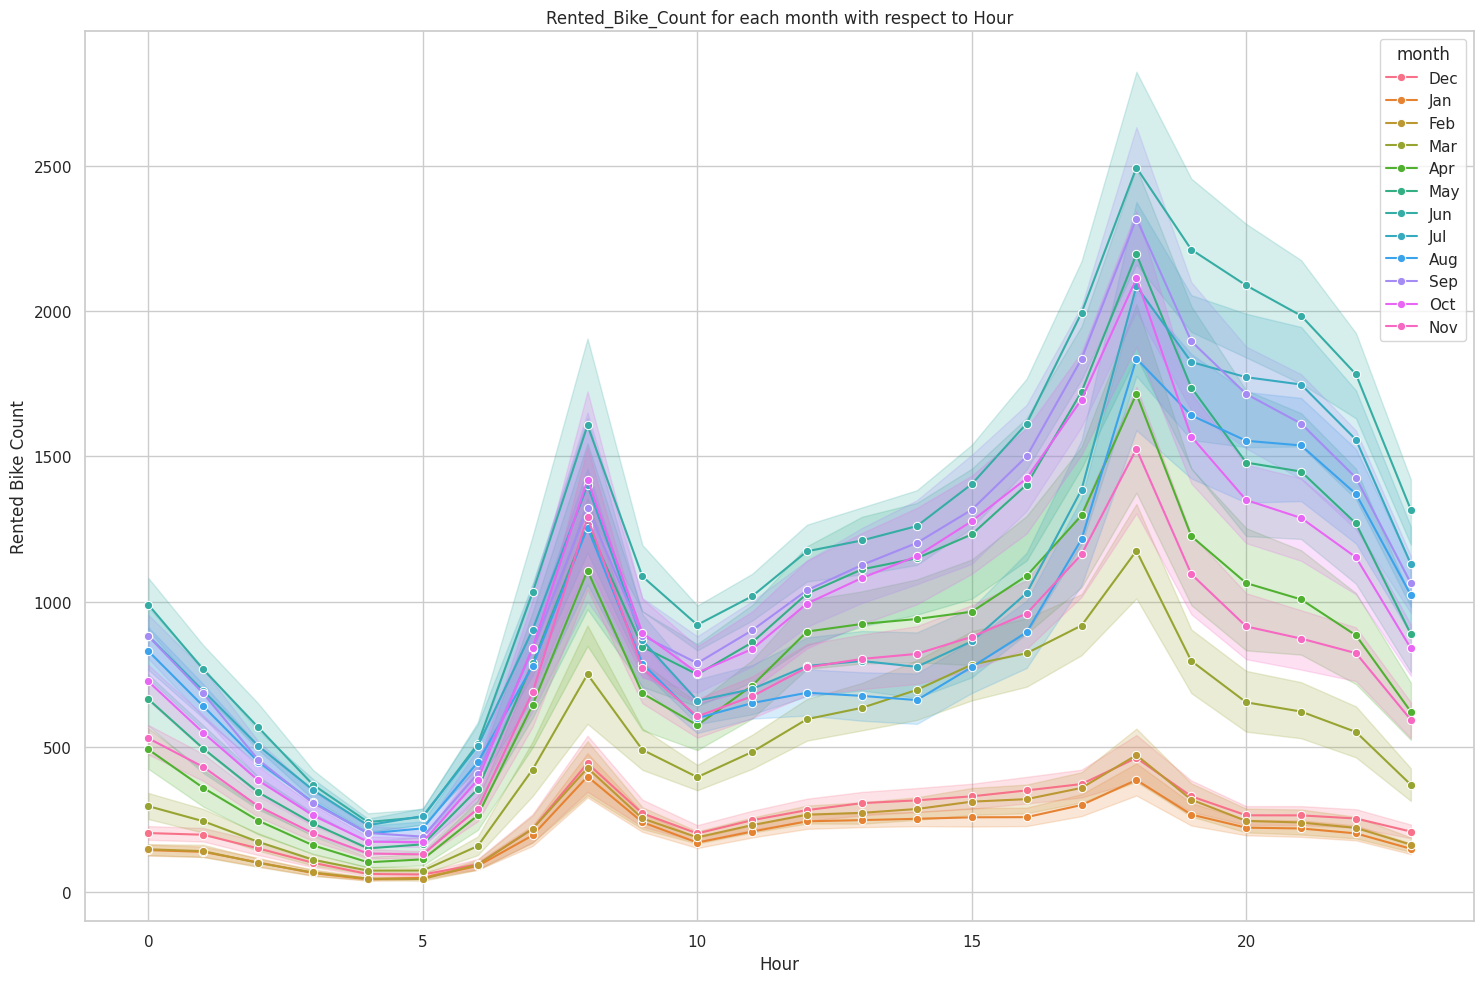

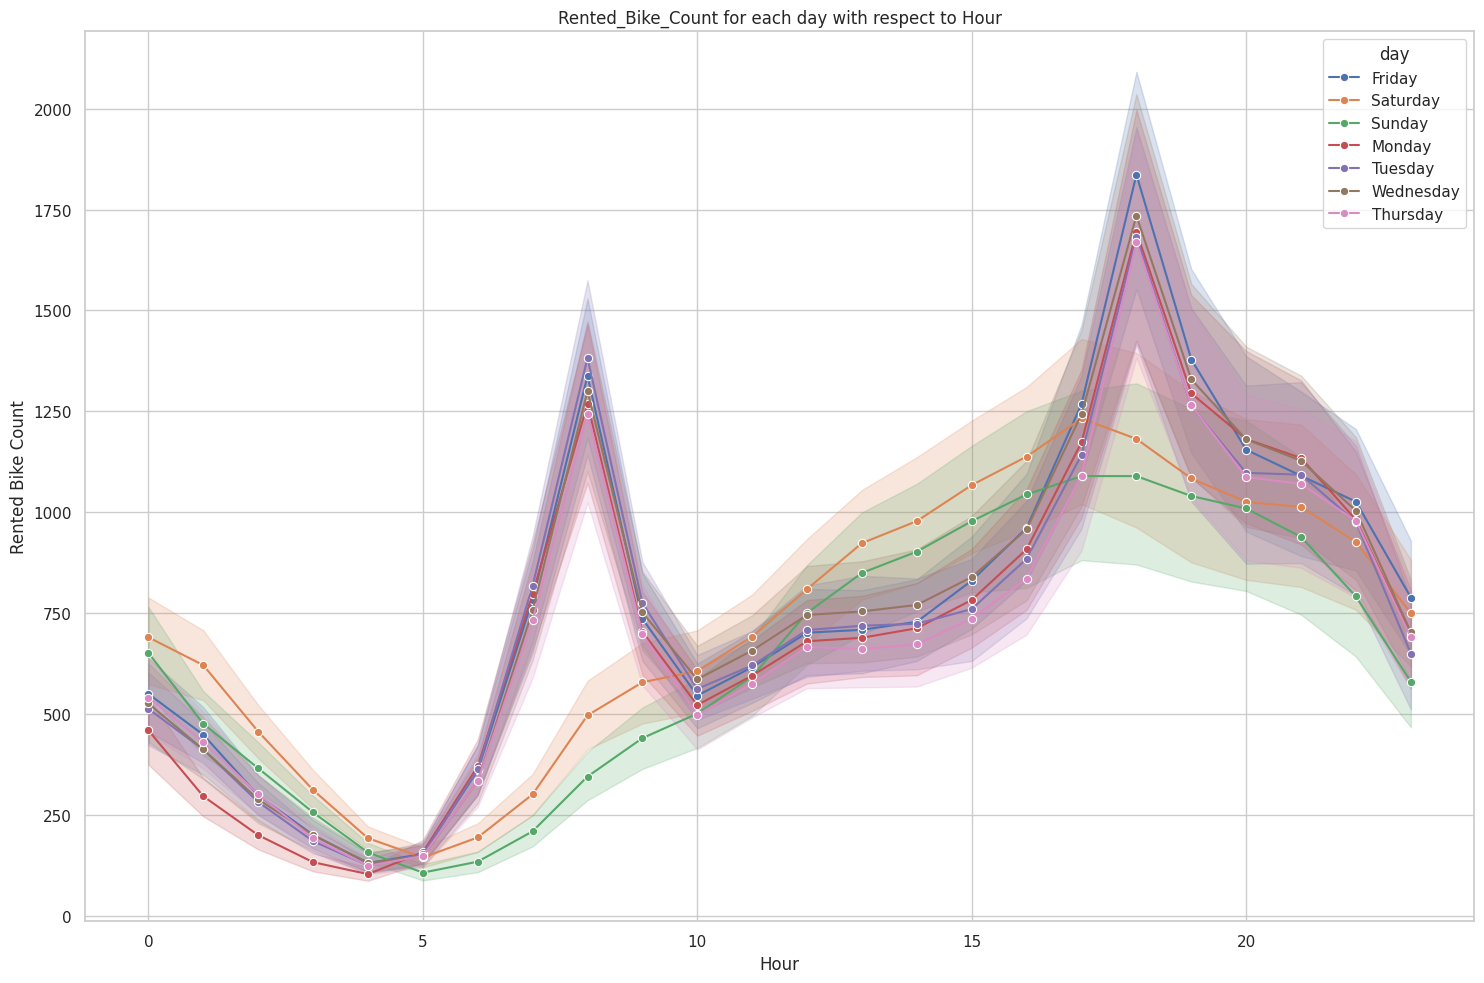

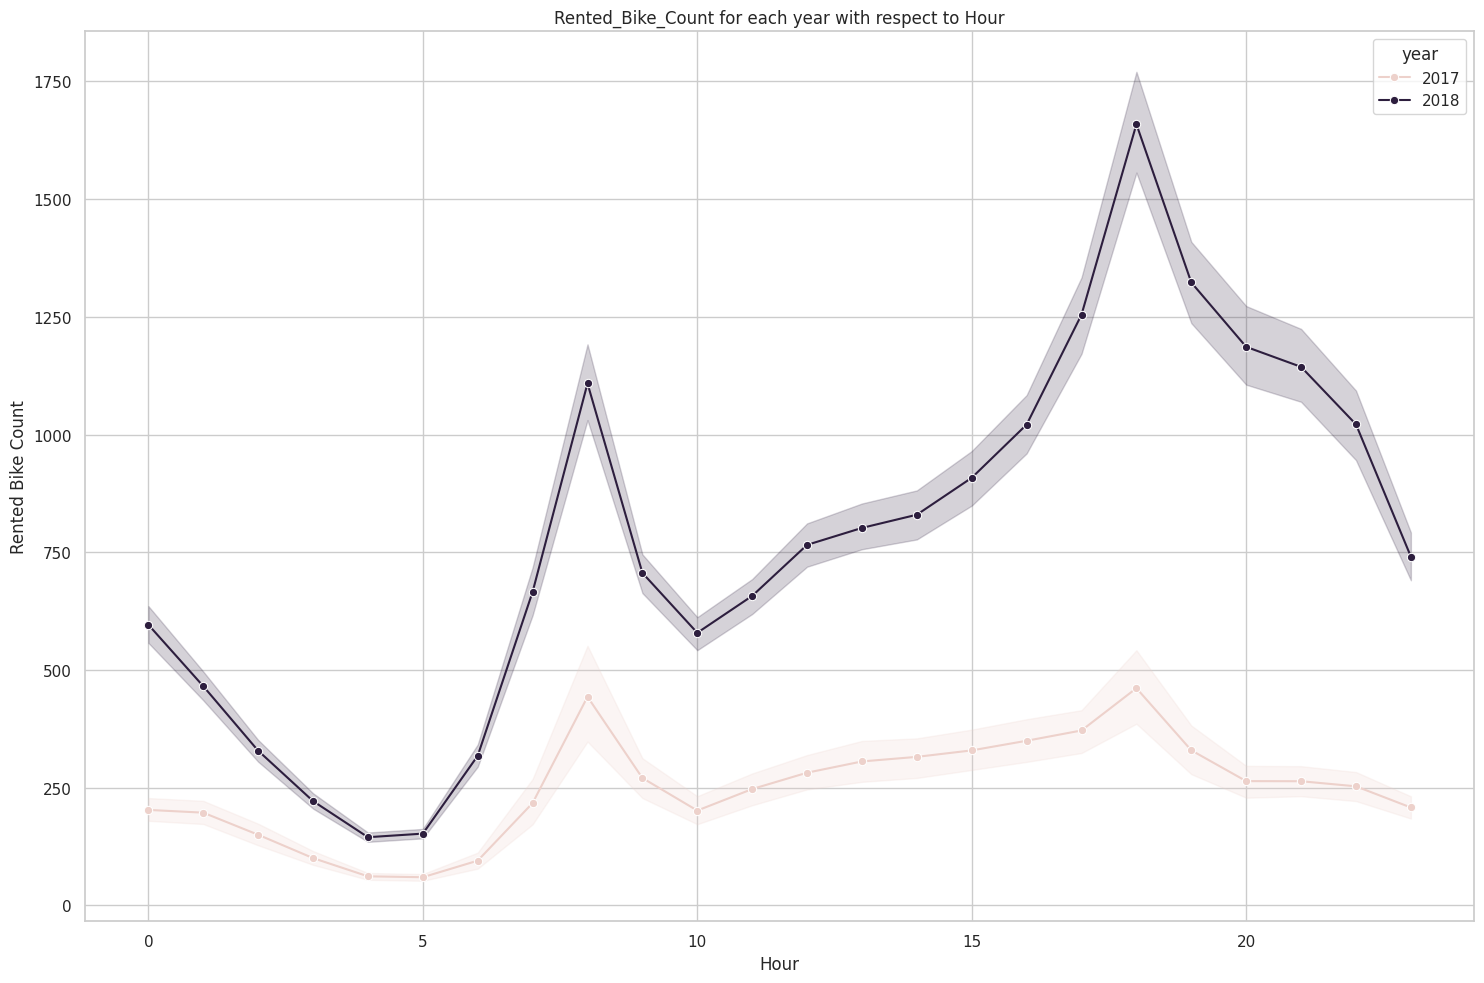

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check if all categorical features exist in the DataFrame
existing_cat_features = [i for i in cat_feature if i in value.columns and i != 'Hour']

for i in existing_cat_features:
    plt.figure(figsize=(15, 10))
    sns.lineplot(x=value["Hour"], y=value['Rented_Bike_Count'], hue=value[i], marker='o')
    plt.title(f"Rented_Bike_Count for each {i} with respect to Hour")
    plt.xlabel("Hour")
    plt.ylabel("Rented Bike Count")
    plt.legend(title=i)
    plt.tight_layout()
    plt.show()


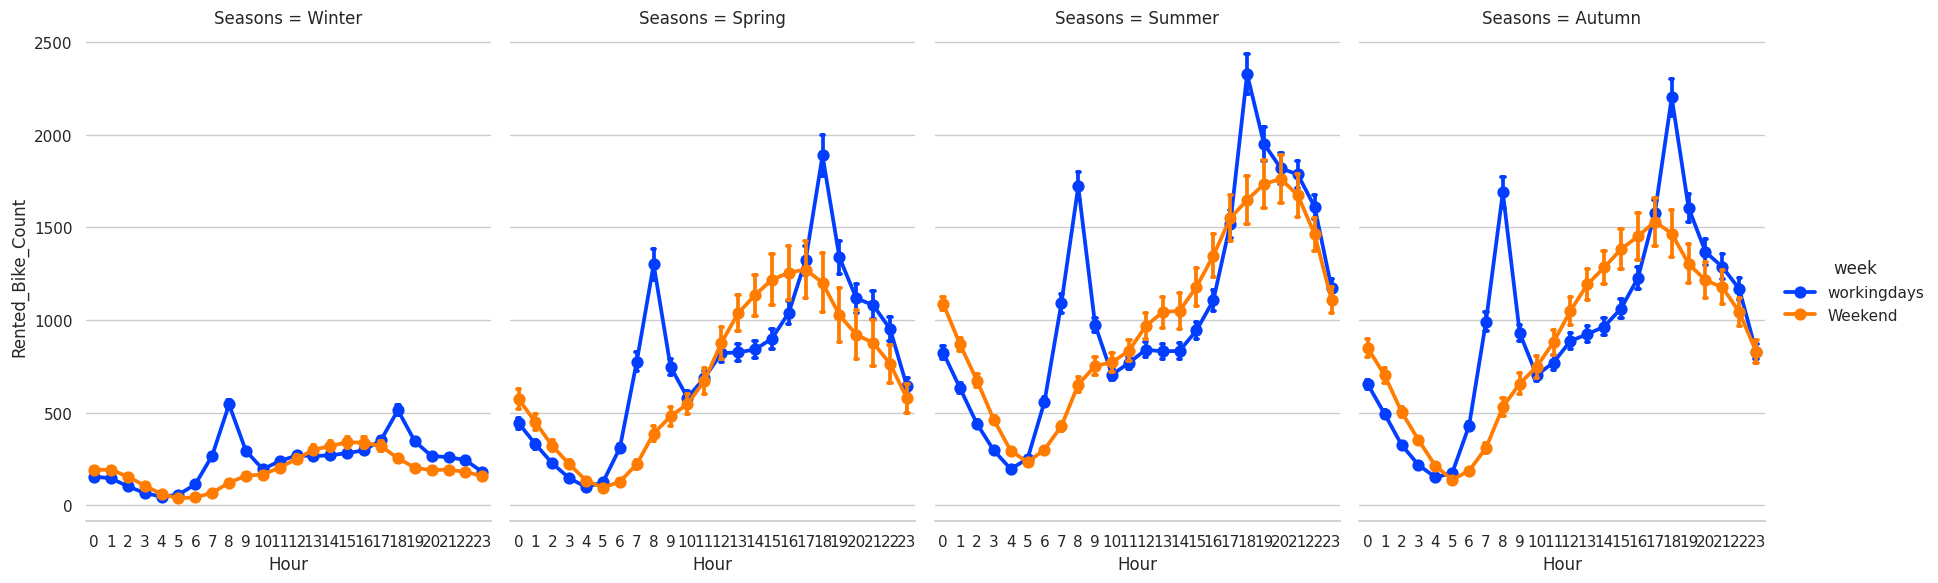

In [ ]:
# Draw a pointplot to show bike demand as a function of three categorical factors(season,week, hour)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Seasons",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);

for every season,demand for bike is high on working days comparing to weekends.

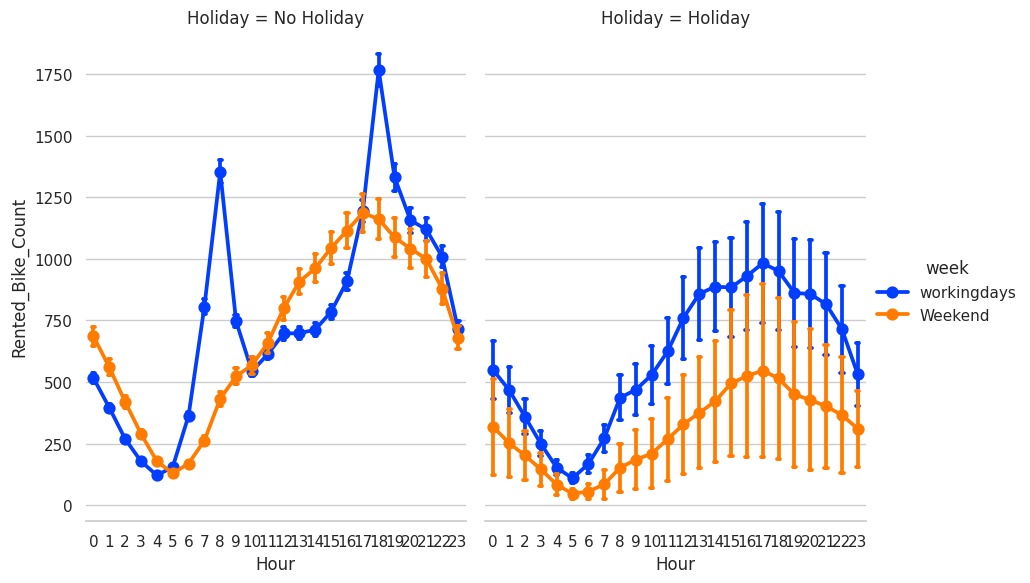

In [ ]:
# Draw a pointplot to show bike demand as a function of three categorical factors(hour, week, holiday)
sns.set_context('notebook')
g = sns.catplot(
    data= value, x="Hour", y="Rented_Bike_Count", hue="week", col="Holiday",
    capsize=.2, palette="bright", errorbar="se",
    kind="point", height=6, aspect=.75,
);
g.despine(left=True);

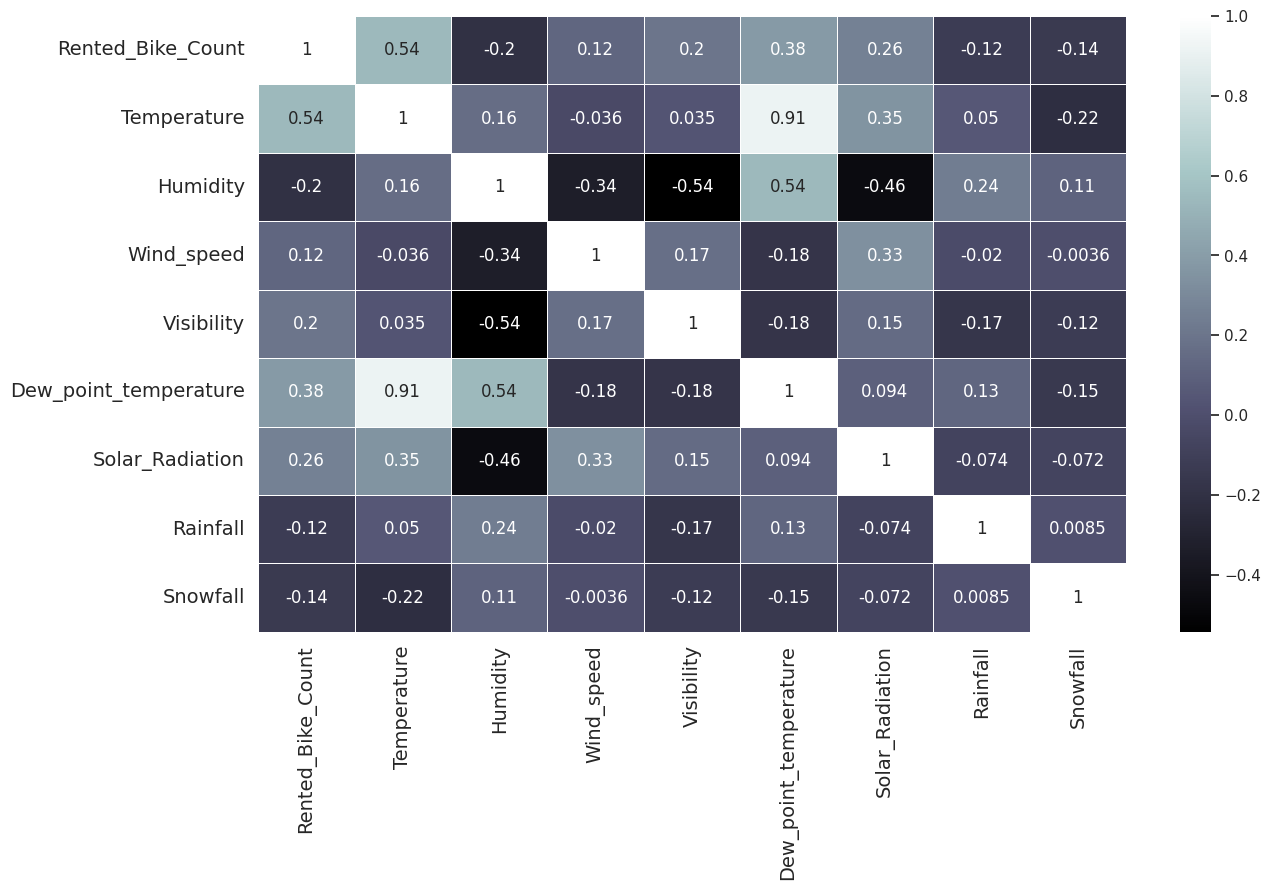

In [ ]:
# plotting heatmap with correlation value to check relation between multiple variable
sns.set_context('notebook')
plt.figure(figsize = (14,8))
plt.xticks(fontsize= 14)
plt.yticks(fontsize= 14)
sns.heatmap(num_feature.corr(), annot=True, linewidth=.5,cmap="bone");

* If two variable or features show relationship either in same or opposite direction, then these variables thus show correlation between them.
* Multi colinearity between temperature and dew point temperature !
* Without functioning day column it shows better correlation.

* From the above EDA, these are some conclusions:
  
  1. Features like Rented_Bike_Count, Wind_speed and Solar Radiation(MJ/m2) shows positive skewness.
  2. Feature visibility(10m) shows negative skewness.
  3. Demand for bike is more during moring and evening mostly around 7-9 in morning and 6-8 in evening.
  4. Demand for bike is more during working days than on weekend.
  5. Demand for bike is zero on non functional day.
  6. Demand of bike is less on holiday.
  7. Demand of bike is more during summer than in winter.

# ***6. Feature Engineering***

Outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Define a list of color palettes or color codes
color_palette = sns.color_palette("husl", 20)  # 20 distinct, vibrant colors

# Checking outliers using box plot with random colors
def box_plot(df, feature):
    i = 1
    for col in feature.columns:
        plt.figure(figsize=(20, 18))
        plt.subplot(5, 2, i)
        i += 1

        random_color = random.choice(color_palette)

        if df[col].dtypes == 'object':
            sns.boxplot(x=df[col], y=df["Rented_Bike_Count"], color=random_color)
        else:
            sns.boxplot(y=df[col], color=random_color)

        plt.xticks(fontsize=18, rotation=90)
        plt.tight_layout()
        plt.show()


In [ ]:
cat_feature = value.select_dtypes(include ='object')

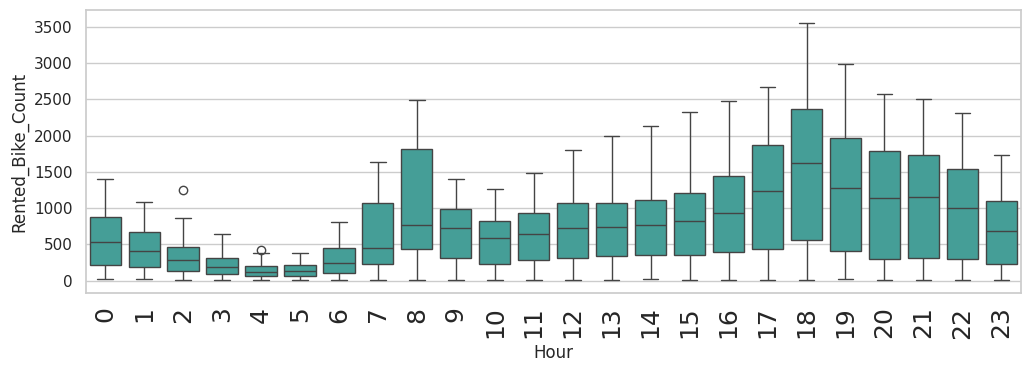

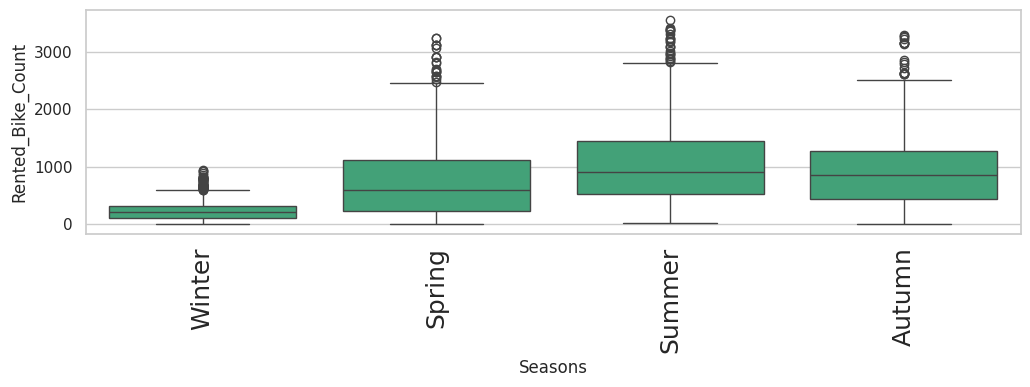

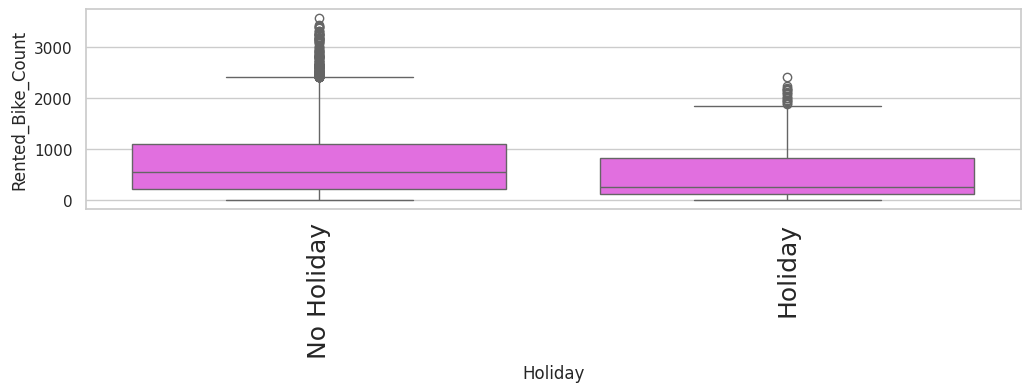

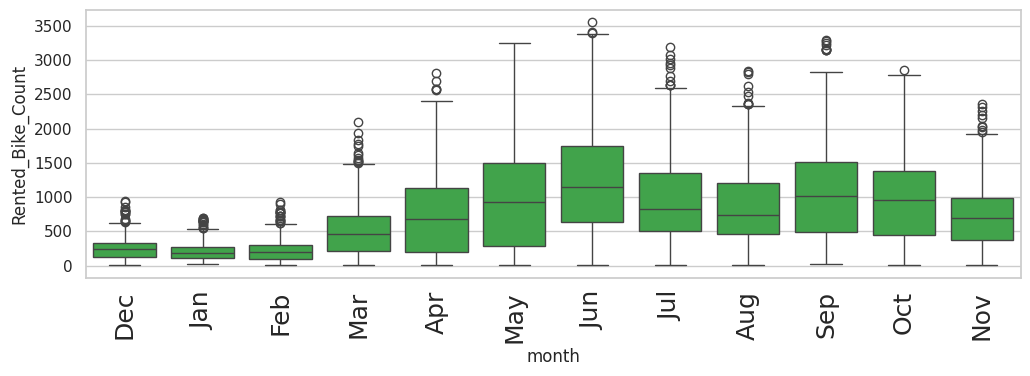

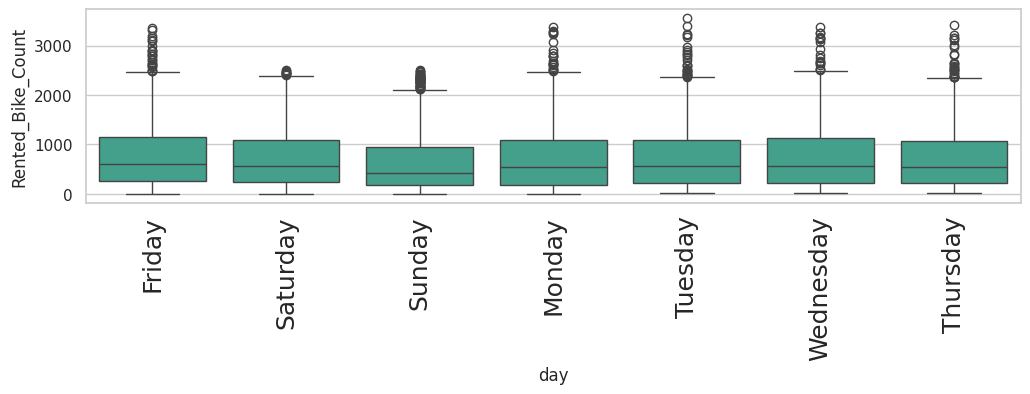

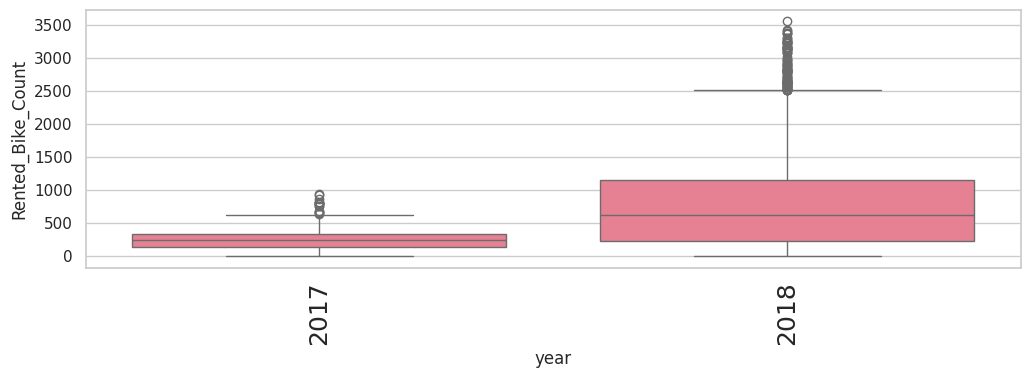

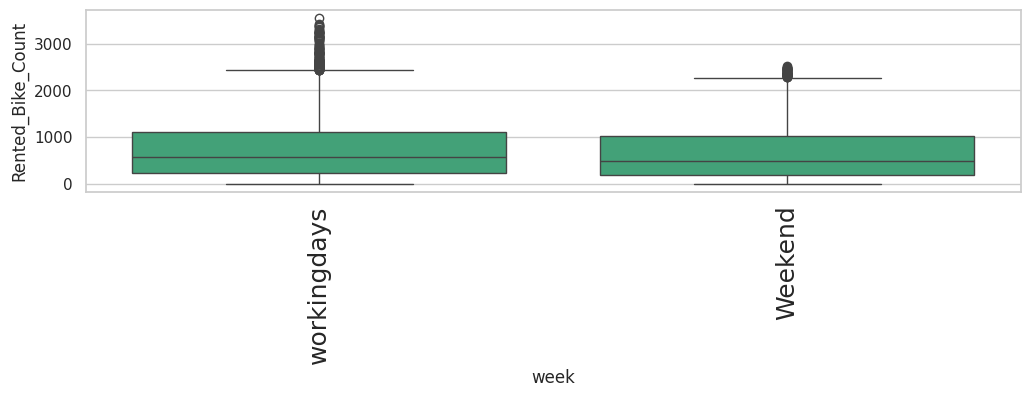

In [ ]:
box_plot(value,cat_feature)

In [ ]:
num_feature = value.select_dtypes(exclude = 'object')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def box_plot2(df):
    num_df = df.select_dtypes(include=['int64', 'float64'])
    cols = num_df.columns
    n = len(cols)

    # Set up the grid
    n_cols = 3  # Number of plots per row
    n_rows = (n + n_cols - 1) // n_cols  # Compute required rows

    plt.figure(figsize=(6 * n_cols, 5 * n_rows))

    for i, col in enumerate(cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.boxplot(y=df[col], color=sns.color_palette("Set2")[i % 8])
        plt.title(f'Box Plot of {col}', fontsize=13)
        plt.xlabel("")
        plt.grid(True)

    plt.tight_layout()
    plt.show()


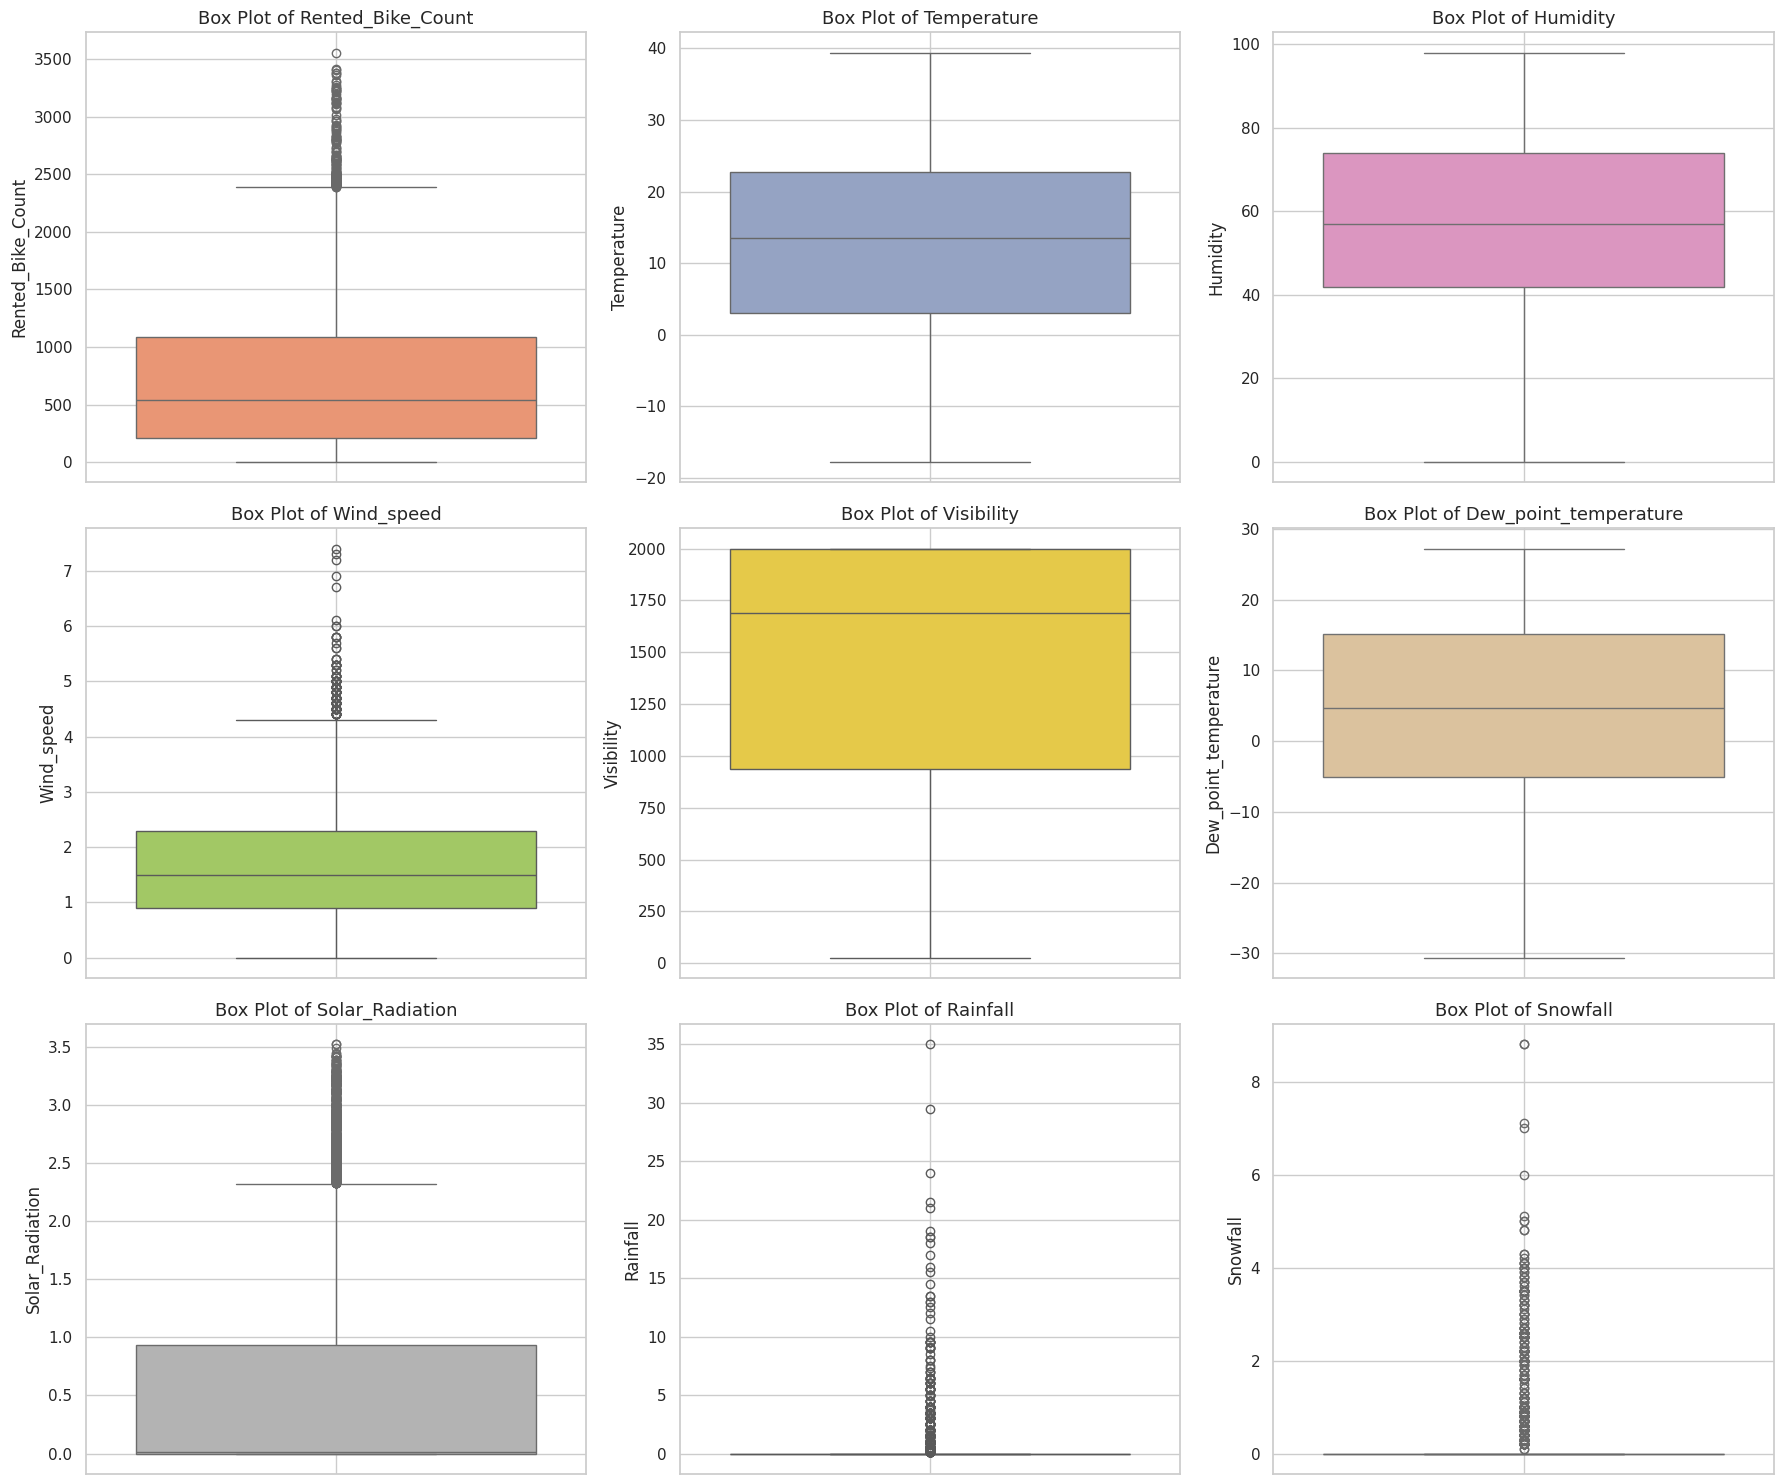

In [ ]:
box_plot2(num_feature)  # Replace num_feature with your DataFrame of numerical columns


rainfall and snowfall not properly visible,hence using scatterplot for visualising the outliers in this regard.

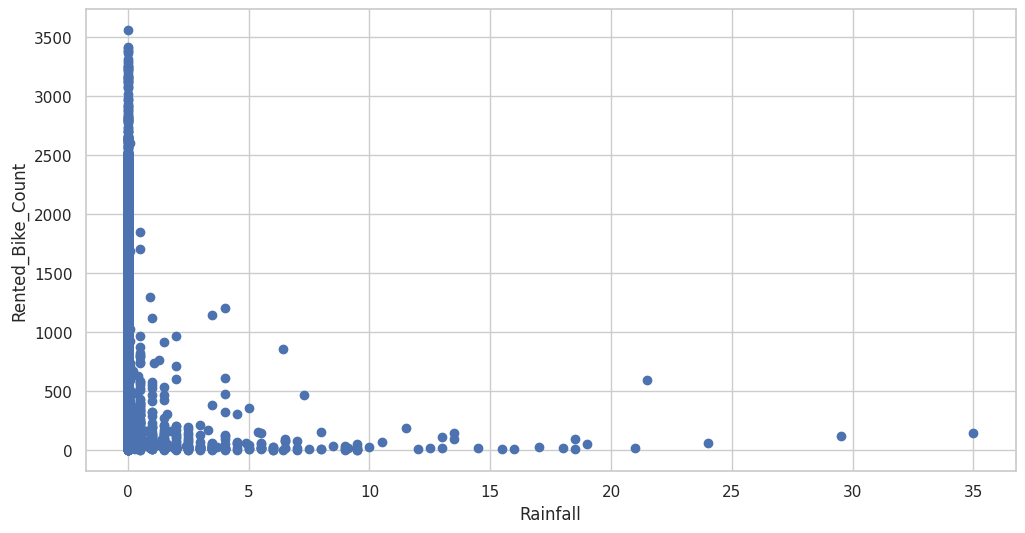

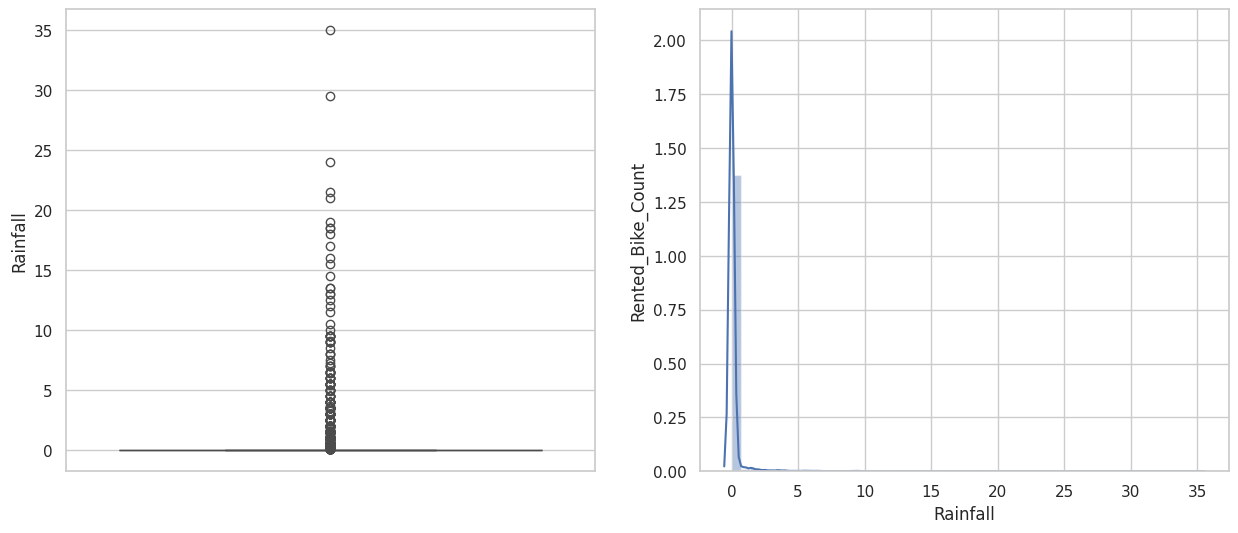

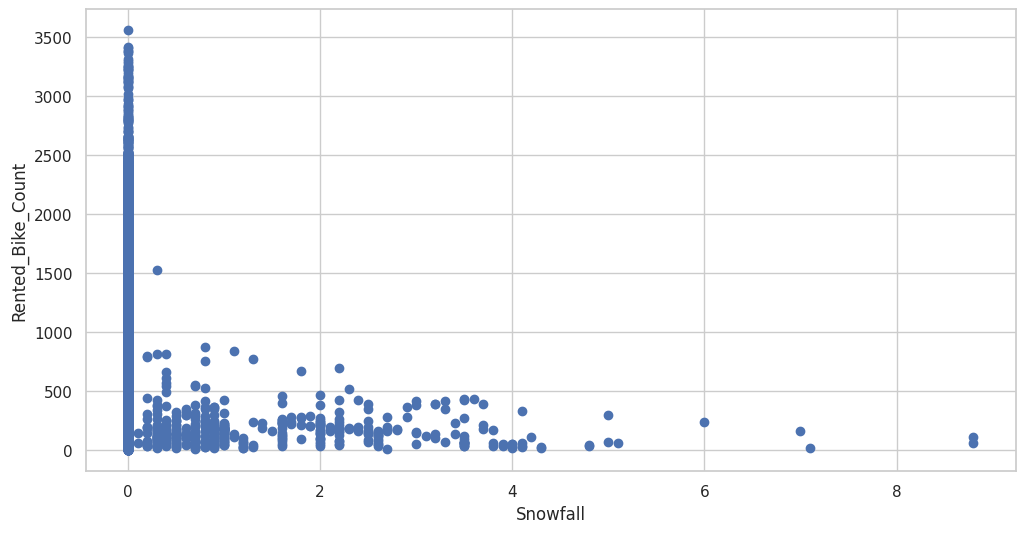

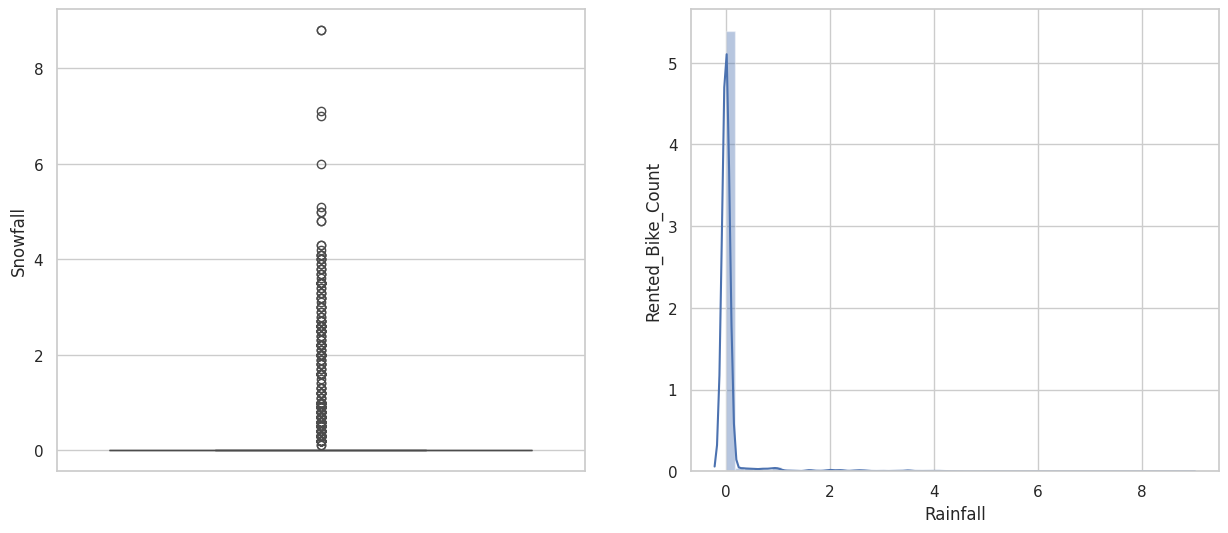

In [ ]:
#detecting outliers using scatter plot for snowfall and rainfall
# Scatter plot
for i in ['Rainfall','Snowfall']:
  fig, ax = plt.subplots(figsize = (12,6))
  ax.scatter(value[i], value['Rented_Bike_Count']);

  # x-axis label
  ax.set_xlabel(i);

  # y-axis label
  ax.set_ylabel('Rented_Bike_Count');

  #distribution and box plot
  plt.figure(figsize=(15,6))
  plt.subplot(1, 2, 1)
  fig = sns.boxplot(y=value[i])
  fig.set_title('')
  fig.set_ylabel(i)

  plt.subplot(1, 2, 2)
  fig = sns.distplot(value[i].dropna())
  fig.set_ylabel('Rented_Bike_Count')
  fig.set_xlabel("Rainfall")

  plt.show()


**IQR Method to remove outliers.**

In [ ]:
def remove_outliers_from_value(df, cat_threshold=0.01):
    df_clean = df.copy()

    # 1. Remove numerical outliers using IQR
    num_cols = df_clean.select_dtypes(include='number').columns
    for col in num_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

    # 2. Remove rows with rare categories in categorical features
    cat_cols = df_clean.select_dtypes(include='object').columns
    for col in cat_cols:
        freq = df_clean[col].value_counts(normalize=True)
        common_cats = freq[freq >= cat_threshold].index
        df_clean = df_clean[df_clean[col].isin(common_cats)]

    return df_clean

# Apply the function
value = remove_outliers_from_value(value)


cat threshold = 0.1, means,Keep only those category values in each categorical column that occur in at least 10% of the rows.

Remove rows where the categorical value is less frequent than 10%.

In [ ]:
value.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6598 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      6598 non-null   int64  
 1   Hour                   6598 non-null   object 
 2   Temperature            6598 non-null   float64
 3   Humidity               6598 non-null   int64  
 4   Wind_speed             6598 non-null   float64
 5   Visibility             6598 non-null   int64  
 6   Dew_point_temperature  6598 non-null   float64
 7   Solar_Radiation        6598 non-null   float64
 8   Rainfall               6598 non-null   float64
 9   Snowfall               6598 non-null   float64
 10  Seasons                6598 non-null   object 
 11  Holiday                6598 non-null   object 
 12  month                  6598 non-null   object 
 13  day                    6598 non-null   object 
 14  year                   6598 non-null   object 
 15  week     

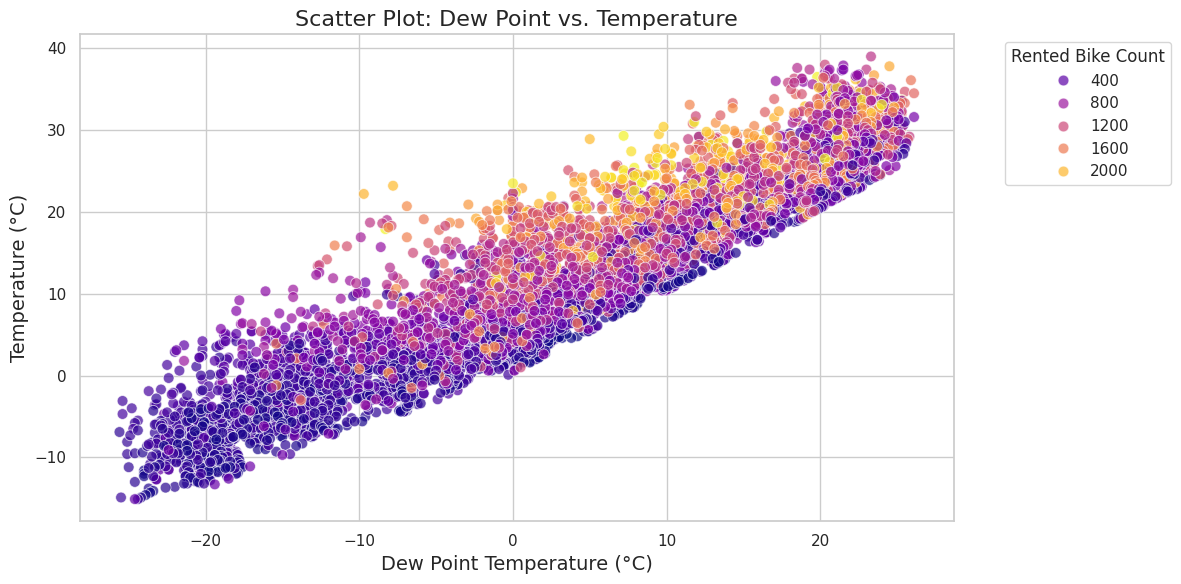

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot between Dew point temperature and Temperature
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    x=value["Dew_point_temperature"],
    y=value["Temperature"],
    hue=value["Rented_Bike_Count"],
    palette="plasma",
    alpha=0.7,
    edgecolor='w',
    s=60
)

plt.title("Scatter Plot: Dew Point vs. Temperature", fontsize=16)
plt.xlabel("Dew Point Temperature (°C)", fontsize=14)
plt.ylabel("Temperature (°C)", fontsize=14)
plt.legend(title="Rented Bike Count", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


high correlation between temp and dew point temp.

**Varience inflation Factor :**

* Calculating vif identify the strength of correlation between independent variable and the strength of that correlation.
* Vif **starts** at **1** and has **no upper limit**.

* **1-5** : **Moderate**, No corrective measure

* **Greater than 5**: **Severe**, Coefficient and p-value are questionable

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
#calculating vif
calc_vif(value[[i for i in value.describe().columns if i not in ['Rented_Bike_Count']]])

variables        VIF
0            Temperature  26.638181
1               Humidity   5.048587
2             Wind_speed   4.596439
3             Visibility   9.201492
4  Dew_point_temperature  14.590580
5        Solar_Radiation   2.196471
6               Rainfall        NaN
7               Snowfall        NaN

VIF > 10: High multicollinearity – consider removing that feature.

VIF ~1: No multicollinearity.

VIF 1–5: Acceptable range, but monitor.

Rremoving dew point temperature because of multi colinearity.

In [ ]:
value.drop(['Dew_point_temperature'], axis=1, inplace=True)


## ***7.Data Preprocessing.***

Encoding Categorical Variables.

In [ ]:
values = value.copy()

In [ ]:
# removing day column
values = values.drop(columns=['day'], axis = 1)

In [ ]:
# remving year column
values = values.drop(columns =['year'], axis = 1)

In [ ]:
# selecting numerical and categorical variables from values
num = values.select_dtypes(exclude ='object')
cat = values.select_dtypes(include ='object')
print(f' numeric: {num.columns.to_list()}\n categorial : {cat.columns.to_list()}')

 numeric: ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']
 categorial : ['Hour', 'Seasons', 'Holiday', 'month', 'week']


In [ ]:
#applying label encoder
encoded = values.apply(LabelEncoder().fit_transform)
encoded.head(1)

Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                246     0           88        27          22        1641   

   Solar_Radiation  Rainfall  Snowfall  Seasons  Holiday  month  week  
0                0         0         0        3        1      2     1

**Data Transformation**

In [ ]:
# transforming the dependent variable with square root transform.
encoded['Rented_Bike_Count']=np.sqrt(encoded['Rented_Bike_Count'])

<Axes: xlabel='Rented_Bike_Count', ylabel='Density'>

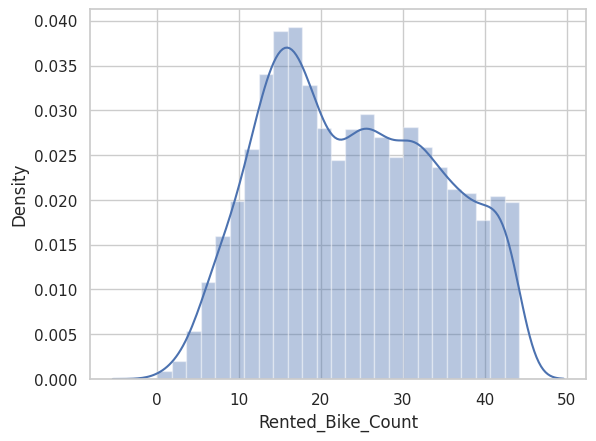

In [ ]:
sns.distplot(encoded['Rented_Bike_Count'])

minimal skewness.

In [ ]:
encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6598 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rented_Bike_Count  6598 non-null   float64
 1   Hour               6598 non-null   int64  
 2   Temperature        6598 non-null   int64  
 3   Humidity           6598 non-null   int64  
 4   Wind_speed         6598 non-null   int64  
 5   Visibility         6598 non-null   int64  
 6   Solar_Radiation    6598 non-null   int64  
 7   Rainfall           6598 non-null   int64  
 8   Snowfall           6598 non-null   int64  
 9   Seasons            6598 non-null   int64  
 10  Holiday            6598 non-null   int64  
 11  month              6598 non-null   int64  
 12  week               6598 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 721.7 KB


## ***8. MODEL TRAINING***

In [ ]:
# creating dependent and independent variables for model
X=encoded.drop('Rented_Bike_Count',axis=1)  # independent variable
y=encoded['Rented_Bike_Count'] # dependent variable

In [ ]:
# first 3 row of independent variables
X.head(3)

Hour  Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  \
0     0           88        27          22        1641                0   
1     1           85        28           8        1641                0   
2     2           80        29          10        1641                0   

   Rainfall  Snowfall  Seasons  Holiday  month  week  
0         0         0        3        1      2     1  
1         0         0        3        1      2     1  
2         0         0        3        1      2     1

In [ ]:
#spilitting into test and train data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
print(f'Shape of X_train => {X_train.shape}, Shape of X_test => {X_test.shape}' )
print(f'Shape of y_train => {y_train.shape}, Shape of y_test => {y_test.shape}' )

Shape of X_train => (5278, 12), Shape of X_test => (1320, 12)
Shape of y_train => (5278,), Shape of y_test => (1320,)


scaling the data using standard scaler

In [ ]:
#scaling feature
scaler = StandardScaler()
# standardization
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model1 = [
          ['Linear Regression ', LinearRegression()],
           ['Lasso ', Lasso(alpha =0.1 , max_iter= 2000)],
           ['Ridge ', Ridge(alpha =0.1 , max_iter= 2000)],
           ['KNeighborsRegressor ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='absolute_error',random_state=42)]
        ]

    ====================  Linear Regression  ====================


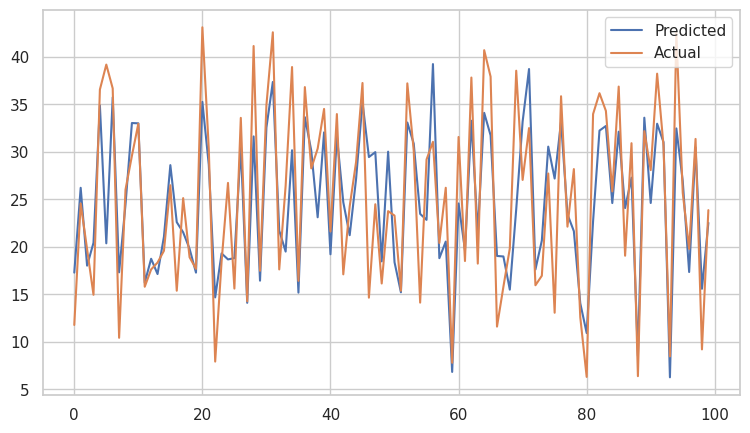

    ====================  Lasso  ====================


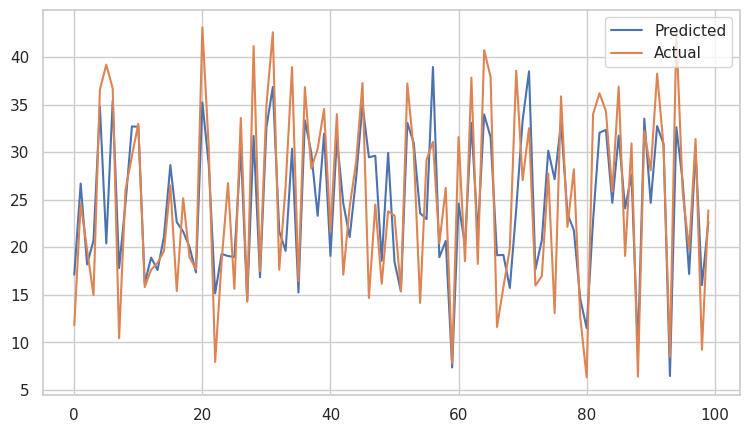

    ====================  Ridge  ====================


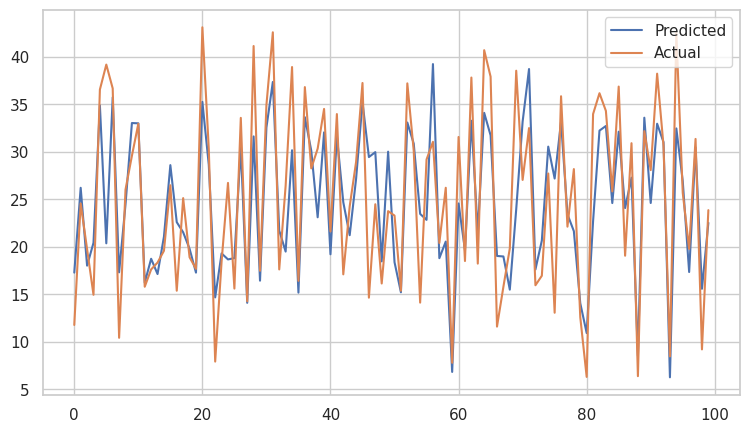

    ====================  KNeighborsRegressor  ====================


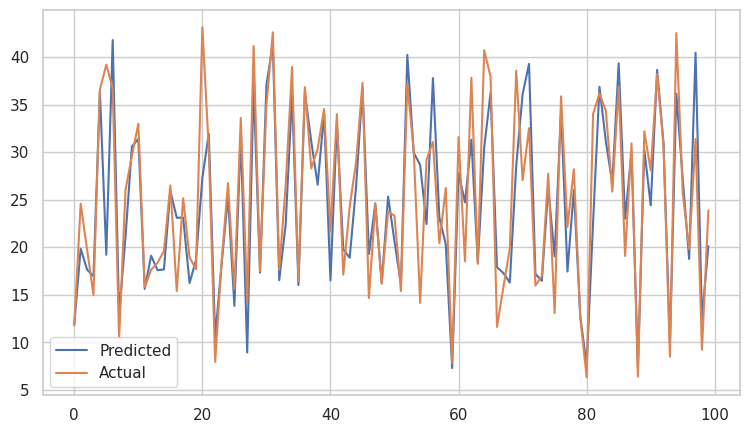

    ====================  RandomForest  ====================


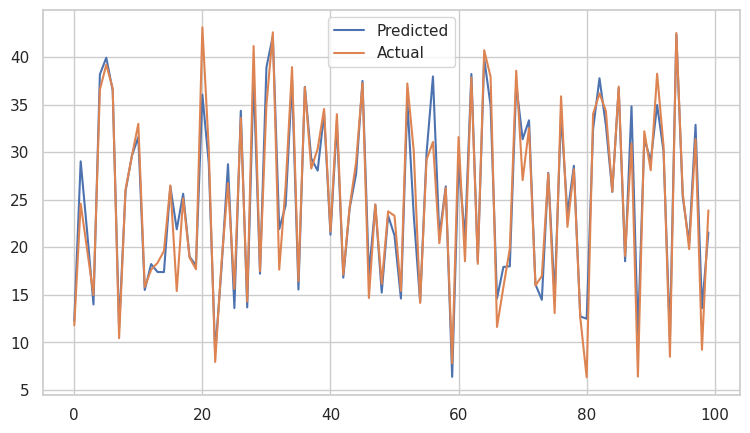

In [ ]:
#running the models and getting the scores
model_score = []
for name,model in model1 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score.append(model_data)

In [ ]:
#result for model
model1_df = pd.DataFrame(model_score)
model1_df

Name        MSE      RMSE  R2_Score    ADJ_R2
0    Linear Regression   38.015637  6.165682  0.651036  0.647832
1                Lasso   38.208662  6.181316  0.649264  0.646044
2                Ridge   38.015718  6.165689  0.651035  0.647832
3  KNeighborsRegressor   23.722052  4.870529  0.782244  0.780245
4         RandomForest    8.002931  2.828945  0.926537  0.925863

In [ ]:
# model result based on r2 score
model1_df.sort_values(by=['R2_Score'], ascending = False)

Name        MSE      RMSE  R2_Score    ADJ_R2
4         RandomForest    8.002931  2.828945  0.926537  0.925863
3  KNeighborsRegressor   23.722052  4.870529  0.782244  0.780245
0    Linear Regression   38.015637  6.165682  0.651036  0.647832
2                Ridge   38.015718  6.165689  0.651035  0.647832
1                Lasso   38.208662  6.181316  0.649264  0.646044

Boosting

In [ ]:
#boosting algorithm
model2 = [
           ['GradientBoostingRegressor ', GradientBoostingRegressor(n_estimators=400, max_depth=4)] ,
           ['Light-GBM ', lightgbm.LGBMRegressor(num_leaves=41, n_estimators=400,random_state=42)],
           ['XGBRegressor ', XGBRegressor(objective= 'reg:squarederror')]
]

    ====================  GradientBoostingRegressor  ====================


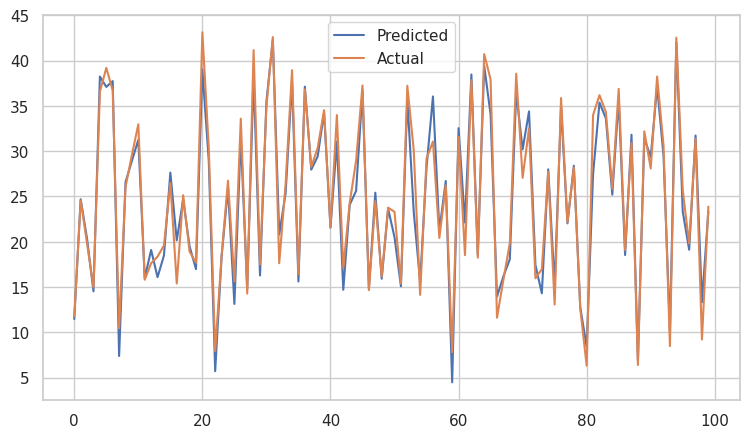

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 902
[LightGBM] [Info] Number of data points in the train set: 5278, number of used features: 10
[LightGBM] [Info] Start training from score 24.016747
    ====================  Light-GBM  ====================


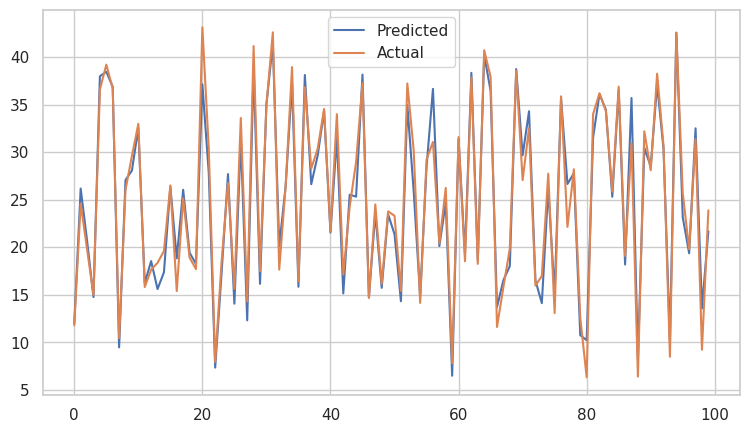

    ====================  XGBRegressor  ====================


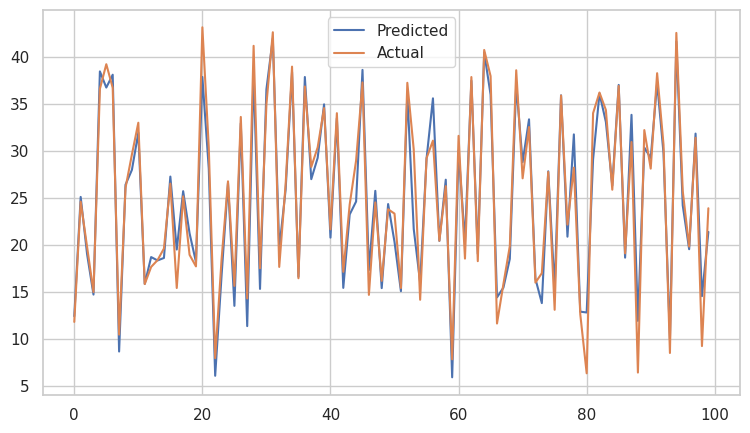

In [ ]:
#running the models and getting the scores
model_score2 = []
for name,model in model2 :
    model_data = {}
    model_data["Name"] = name
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    model_data["MSE"] = mse(y_test, y_pred)
    model_data["RMSE"] = np.sqrt(model_data["MSE"])
    model_data["R2_Score"] = r2(y_test, y_pred)
    model_data["ADJ_R2"] = 1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print(f'    {20* "="}  {name} {20* "="}')  # plot actual vs predicted graph
    plt.figure(figsize=(9,5))
    plt.plot((y_pred)[:100])
    plt.plot((np.array(y_test)[:100]))
    plt.legend(["Predicted","Actual"])
    plt.show()
    model_score2.append(model_data)

In [ ]:
model2_df = pd.DataFrame(model_score2)
model2_df

Name       MSE      RMSE  R2_Score    ADJ_R2
0  GradientBoostingRegressor   6.688780  2.586268  0.938600  0.938037
1                  Light-GBM   5.940819  2.437380  0.945466  0.944966
2               XGBRegressor   6.603747  2.569776  0.939381  0.938824

In [ ]:
#merging final result
a= [model1_df,model2_df]
final = pd.concat(a,ignore_index=True)
final.sort_values('R2_Score', ascending =False)

Name        MSE      RMSE  R2_Score    ADJ_R2
6                  Light-GBM    5.940819  2.437380  0.945466  0.944966
7               XGBRegressor    6.603747  2.569776  0.939381  0.938824
5  GradientBoostingRegressor    6.688780  2.586268  0.938600  0.938037
4               RandomForest    8.002931  2.828945  0.926537  0.925863
3        KNeighborsRegressor   23.722052  4.870529  0.782244  0.780245
0          Linear Regression   38.015637  6.165682  0.651036  0.647832
2                      Ridge   38.015718  6.165689  0.651035  0.647832
1                      Lasso   38.208662  6.181316  0.649264  0.646044

from this boosting techniques we can see light GBM and XGB regressor having the highest R2 score.

**Optimization for XGB**

In [ ]:
model = XGBRegressor(objective= 'reg:squarederror',subsample=0.7)

In [ ]:
params = {
     'gamma' : [ -0.5, 0, 0.5, 1],
    'learning_rate' :[0.001, 0.01, 0.1, 5,10 ],
    'n_estimators' : [25,50,75,100,500] ,
    'max_depth' : [3, 5, 7,10]
        }

In [ ]:
gridsearch = GridSearchCV(model , params , cv=2 , return_train_score=True)

In [ ]:
gridsearch.fit(X_train , y_train )

GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [-0.5, 0, 0.5, 1],
                         'learning_rate': [0.001, 0.01, 0.1, 5, 10],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [25, 50, 75, 100, 500]},
             return_train_score=True)

In [ ]:
#print best parameters
print(gridsearch.best_params_)

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500}


In [ ]:
#making prediciton
gridsearch_predictions = gridsearch.predict( X_test )

In [ ]:
XGBRegressor_with_hyper = {
'Name': "XGBRegressor_with_hyper",
'MSE': [mse(y_test,gridsearch.predict(X_test))],
'RMSE': [np.sqrt(mse(y_test,gridsearch.predict(X_test)))],
'R2_Score': [r2(y_test,gridsearch_predictions)],
'ADJ_R2': [1-(1-r2(y_test,y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))],
}

In [ ]:
#concating hyperparameter tuned value with ealier result
Result = pd.DataFrame.from_dict(XGBRegressor_with_hyper)
#merging final result
b = [final,Result]
final_df = pd.concat(b,ignore_index=True)
final_df.sort_values('R2_Score', ascending =False)

Name        MSE      RMSE  R2_Score    ADJ_R2
6                  Light-GBM    5.940819  2.437380  0.945466  0.944966
8     XGBRegressor_with_hyper   6.111878  2.472221  0.943896  0.938824
7               XGBRegressor    6.603747  2.569776  0.939381  0.938824
5  GradientBoostingRegressor    6.688780  2.586268  0.938600  0.938037
4               RandomForest    8.002931  2.828945  0.926537  0.925863
3        KNeighborsRegressor   23.722052  4.870529  0.782244  0.780245
0          Linear Regression   38.015637  6.165682  0.651036  0.647832
2                      Ridge   38.015718  6.165689  0.651035  0.647832
1                      Lasso   38.208662  6.181316  0.649264  0.646044

so with hyper parameter tuning we can see that XGB regressors performance was significcantly improved.

Feature importance:


In [ ]:
# assigning best estimator
rf_optimal_model = gridsearch.best_estimator_

In [ ]:
#displaying feature importance
rf_optimal_model.feature_importances_

array([0.24385294, 0.20859796, 0.03596842, 0.01001113, 0.00988027,
       0.02608467, 0.        , 0.        , 0.2270401 , 0.06493153,
       0.05805026, 0.11558282], dtype=float32)

In [ ]:
#getting columns name as X_train is array and column name 0,1,2, etc
t = pd.DataFrame(X_train, columns = X.columns)

In [ ]:
#creating new dataframe for feature and its importance value
importances = rf_optimal_model.feature_importances_

importance_dict = {'Feature' : list(t.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
#sorting feature imortance from highest to lowest
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0              Hour            0.243853
8           Seasons            0.227040
1       Temperature            0.208598
11             week            0.115583
9           Holiday            0.064932
10            month            0.058050
2          Humidity            0.035968
5   Solar_Radiation            0.026085
3        Wind_speed            0.010011
4        Visibility            0.009880
7          Snowfall            0.000000
6          Rainfall            0.000000

In [ ]:
#plotting pie plot for feature importance using plotly
fig = px.pie(importance_df, values='Feature Importance', names='Feature', title='Feature Importance');
#
fig.update_traces(textposition='inside', textinfo='percent+label');
fig.show();

# **Conclusion :**

*   Hour,seasons,temperature having the highest feature importance priorities.

* **xgbregressor** and **lightbgm** models shows promising result, therefore it can be used to solve this problem.

* Bike rental count is high during week days than on weekend.

* Bike demand shows peek around 8-9 AM in the morning and 6 - 7pm in the evening.

* People prefer to rent bike more in summer than in winter.

* Bike demand is more on clear days than on snowy or rainy days.

* Temperature range from 22 to 25(°C) has more demand for bike.  
